<a href="https://colab.research.google.com/github/derVian/datascience/blob/main/datascienceinternship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose # Added for seasonal decomposition
'''  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.arima.model import ARIMA
  from statsmodels.tsa.statespace.sarimax import SARIMAX
  import warnings
  warnings.filterwarnings('ignore')'''

"  from statsmodels.tsa.stattools import adfuller\n  from statsmodels.tsa.arima.model import ARIMA\n  from statsmodels.tsa.statespace.sarimax import SARIMAX\n  import warnings\n  warnings.filterwarnings('ignore')"

In [ ]:
"""Load solar data from CSV file."""
dfp = pd.read_csv('/content/solar2022uncleaned.csv', skiprows=2)


In [ ]:
dfp_day = dfp[(dfp['GHI'] > 5) & (dfp['GHI'] > dfp['Clearsky GHI'])]
print(dfp_day)

Empty DataFrame
Columns: [Year, Month, Day, Hour, Minute, Temperature, Clearsky DHI, Clearsky DNI, Clearsky GHI, Cloud Type, Relative Humidity, Pressure, Wind Direction, Wind Speed, DHI, DNI, GHI, Solar Zenith Angle, Precipitable Water, Surface Albedo, Fill Flag, Dew Point, Asymmetry, Aerosol Optical Depth, Alpha]
Index: []

[0 rows x 25 columns]


In [ ]:
print(dfp.info())
print(dfp.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   8760 non-null   int64  
 1   Month                  8760 non-null   int64  
 2   Day                    8760 non-null   int64  
 3   Hour                   8760 non-null   int64  
 4   Minute                 8760 non-null   int64  
 5   Temperature            8760 non-null   float64
 6   Clearsky DHI           8760 non-null   int64  
 7   Clearsky DNI           8760 non-null   int64  
 8   Clearsky GHI           8760 non-null   int64  
 9   Cloud Type             8760 non-null   int64  
 10  Relative Humidity      8760 non-null   float64
 11  Pressure               8760 non-null   int64  
 12  Wind Direction         8760 non-null   int64  
 13  Wind Speed             8760 non-null   float64
 14  DHI                    8760 non-null   int64  
 15  DNI 

In [108]:
dfp['DateTime']= pd.to_datetime(dfp[['Year', 'Month', 'Day', 'Hour', 'Minute']])
dfp.set_index('DateTime', inplace=True)
columns_to_drop=('Year')
print(dfp.head())

                     Year  Month  Day  Hour  Minute  Temperature  \
DateTime                                                           
2022-01-01 00:30:00  2022      1    1     0      30          4.9   
2022-01-01 01:30:00  2022      1    1     1      30          5.2   
2022-01-01 02:30:00  2022      1    1     2      30          5.3   
2022-01-01 03:30:00  2022      1    1     3      30          5.3   
2022-01-01 04:30:00  2022      1    1     4      30          5.3   

                     Clearsky DHI  Clearsky DNI  Clearsky GHI  Cloud Type  \
DateTime                                                                    
2022-01-01 00:30:00             0             0             0           1   
2022-01-01 01:30:00             0             0             0           4   
2022-01-01 02:30:00             0             0             0           0   
2022-01-01 03:30:00             0             0             0           0   
2022-01-01 04:30:00             0             0             0

In [109]:
dfp['DateTime']= pd.to_datetime(dfp[['Year', 'Month', 'Day', 'Hour', 'Minute']])
dfp.set_index('DateTime', inplace=True)
columns_to_drop=['Year', 'Month', 'Day', 'Hour', 'Minute'] # Changed to a list
dfp.drop(columns=columns_to_drop, inplace=True)
print(dfp.head())

                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2022-01-01 00:30:00          4.9             0             0             0   
2022-01-01 01:30:00          5.2             0             0             0   
2022-01-01 02:30:00          5.3             0             0             0   
2022-01-01 03:30:00          5.3             0             0             0   
2022-01-01 04:30:00          5.3             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2022-01-01 00:30:00           1              69.27       914             172   
2022-01-01 01:30:00           4              57.26       918             183   
2022-01-01 02:30:00           0              55.49       919             184   
2022-01-01 03:30:00           0              54.39   

creating a datetime object for a better representation of data and also set datatime object as index, droped all of columns were used in the creatin to reduce reduandency

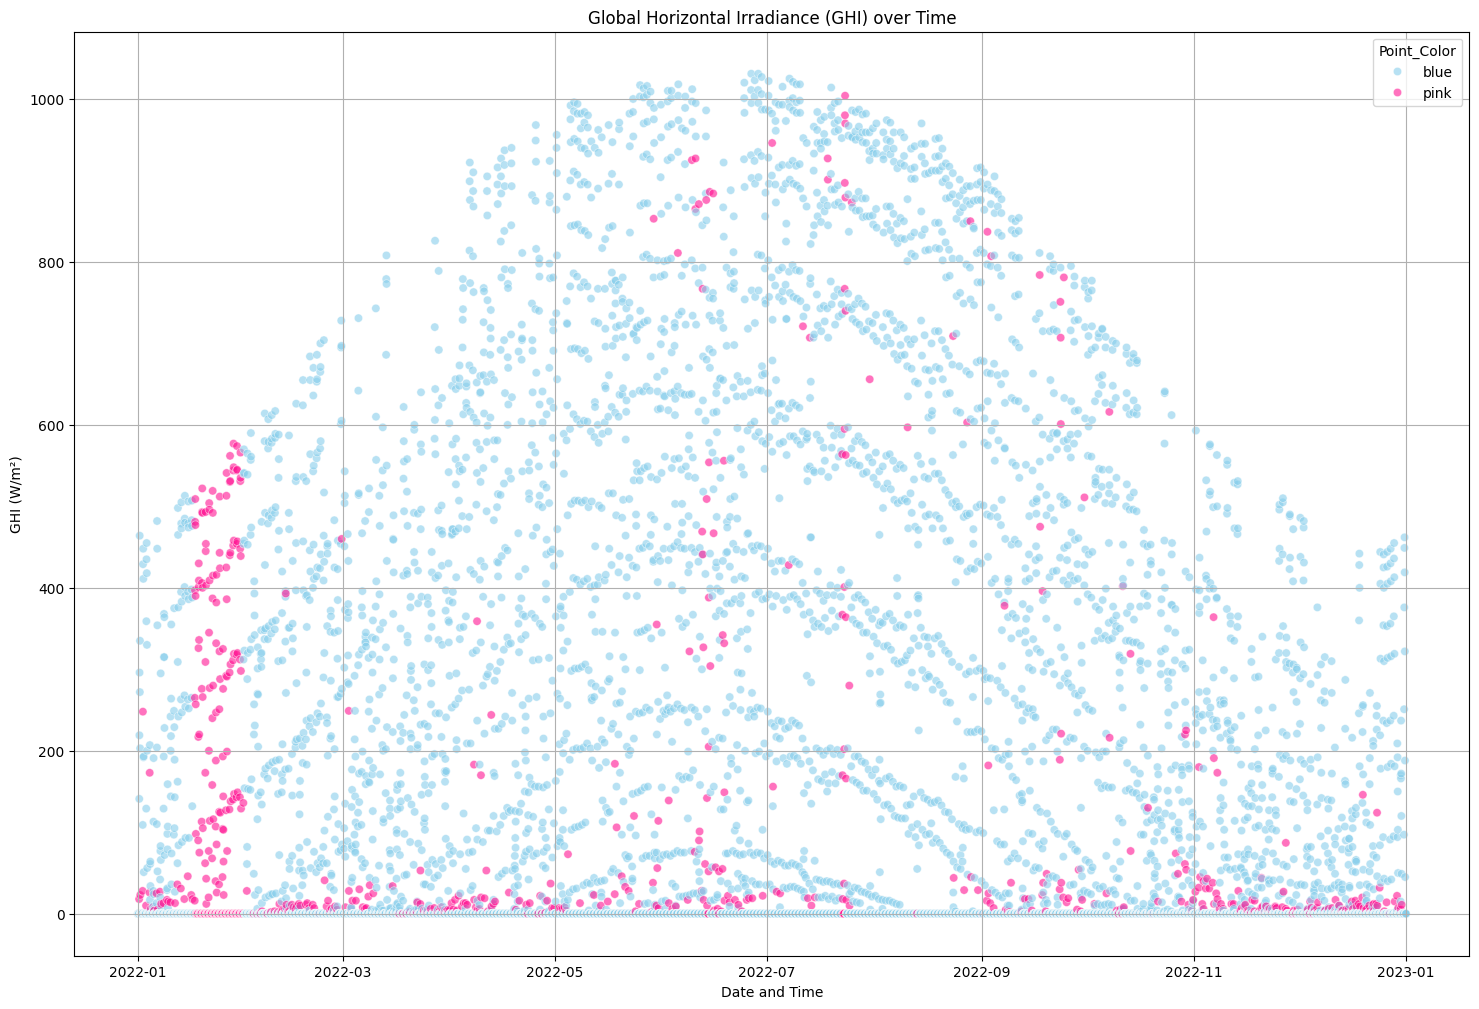

In [110]:
dfp['Point_Color'] = dfp['Fill Flag'].apply(lambda x: 'pink' if x > 0 else 'blue')
plt.figure(figsize=(18, 12))
sns.scatterplot(data=dfp, x=dfp.index, y='GHI', hue='Point_Color', palette={'pink': 'deeppink', 'blue': 'skyblue'}, alpha=0.6)
plt.title('Global Horizontal Irradiance (GHI) over Time')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

inspection of the rows with fill-flag  

In [111]:
dfp_fill_flag = dfp[dfp['Fill Flag'] > 0]
print(dfp_fill_flag['GHI'].mean())
filtered_ghi_zero = dfp_fill_flag[dfp_fill_flag['GHI'] > 5]
if not filtered_ghi_zero.empty:
  print(filtered_ghi_zero['GHI'].mean())
else:
  print("no rows with fill-flag where GHI is 0")


112.61804697156984
197.49347826086955


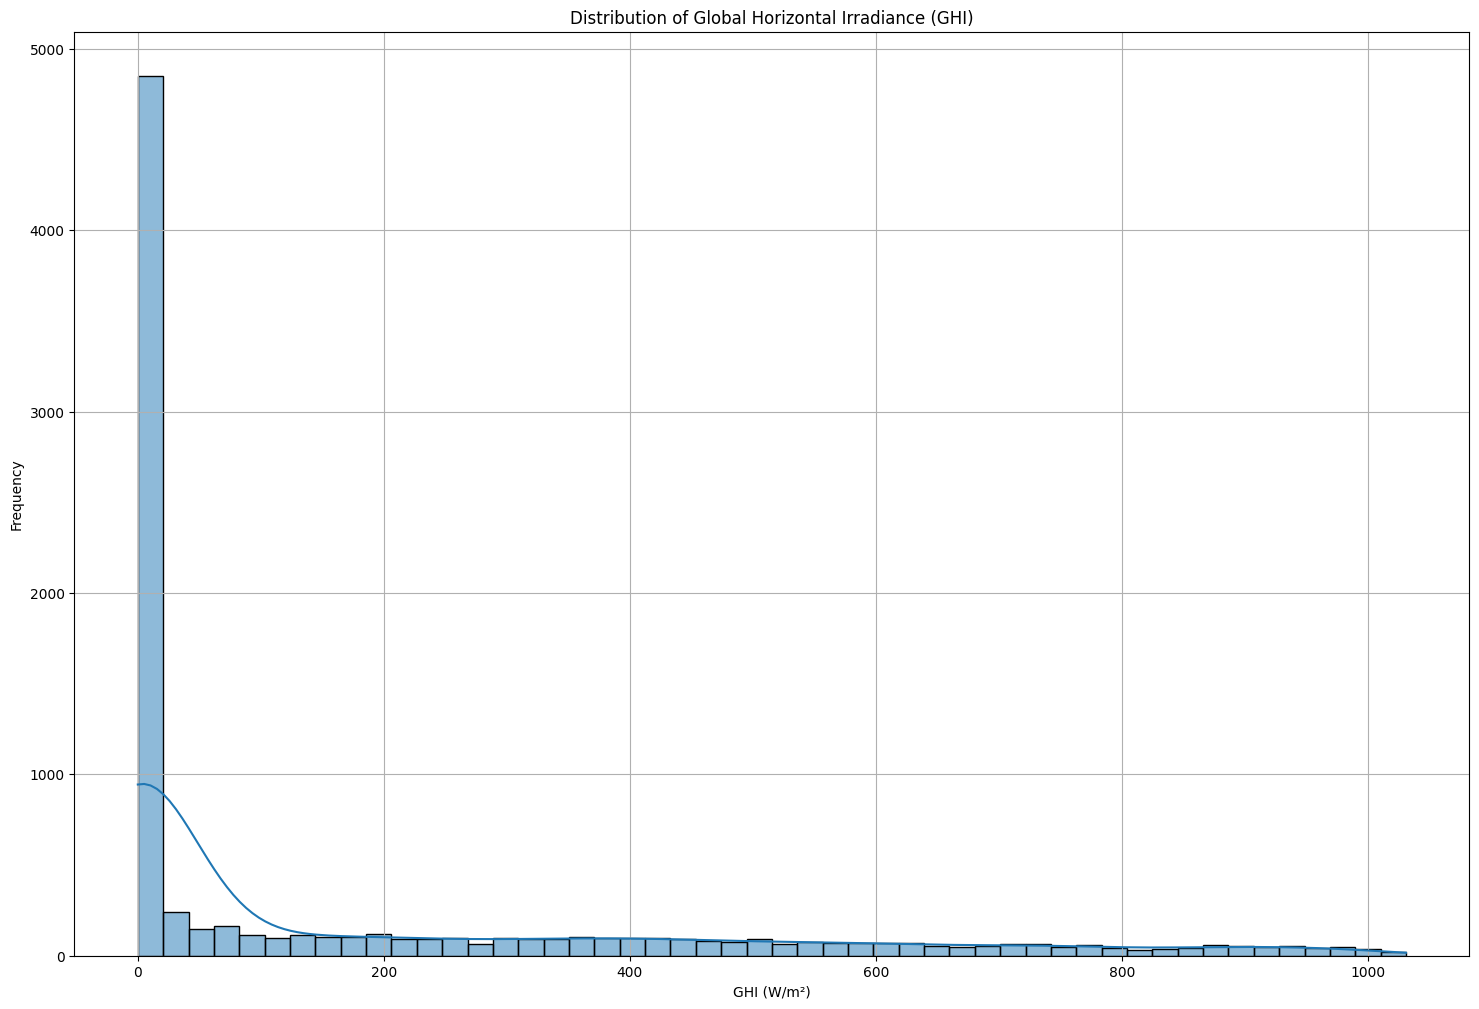

In [112]:
plt.figure(figsize=(18, 12))
sns.histplot(data=dfp, x='GHI', kde=True, bins=50)
plt.title('Distribution of Global Horizontal Irradiance (GHI)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

               GHI
count  8760.000000
mean    183.587900
std     277.095836
min       0.000000
25%       0.000000
50%       0.000000
75%     323.000000
max    1031.000000


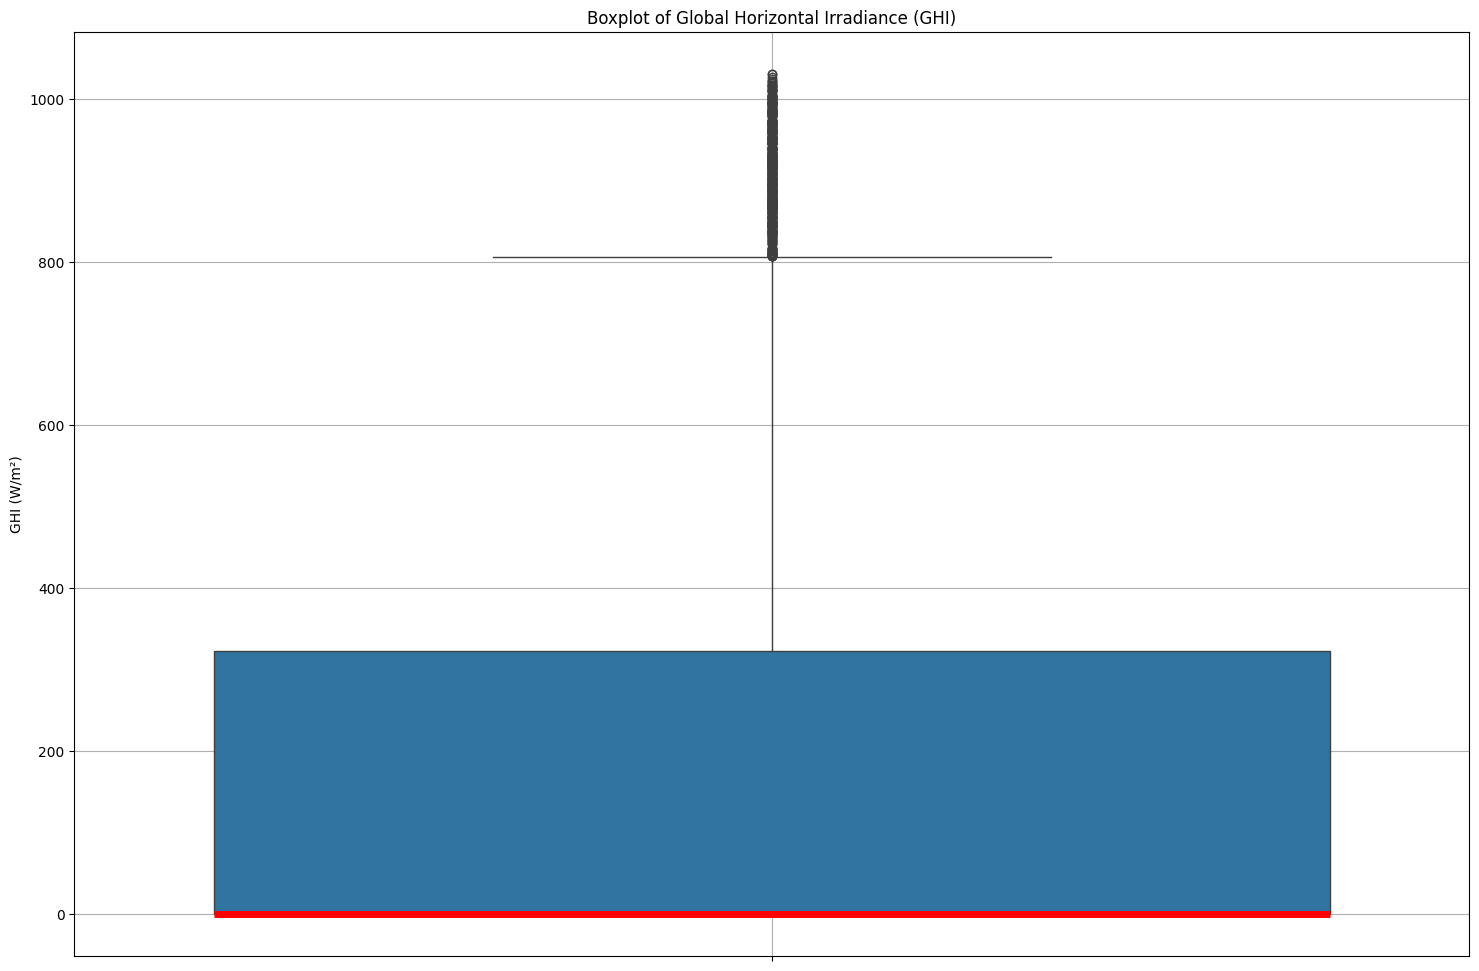

In [113]:
print(dfp[['GHI']].describe())
plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

The boxplot shows that both the first quartile and the median of GHI are equal to zero, indicating that **at least 50% of the observations correspond to zero** irradiance values, primarily associated with night-time conditions. *This strong zero inflation **compresses the interquartile range toward zero**, which causes many valid daytime irradiance values to appear as statistical outliers under the standard IQR-based boxplot definition.* These values are not true anomalies but reflect a distinct daytime irradiance regime. This highlights the need to explicitly handle night-time observations before applying statistical modeling or outlier detection methods. The GHI time series should not be treated as a single homogeneous distribution, and separating or conditioning on daylight hours is necessary for meaningful statistical analysis and time-series modeling.

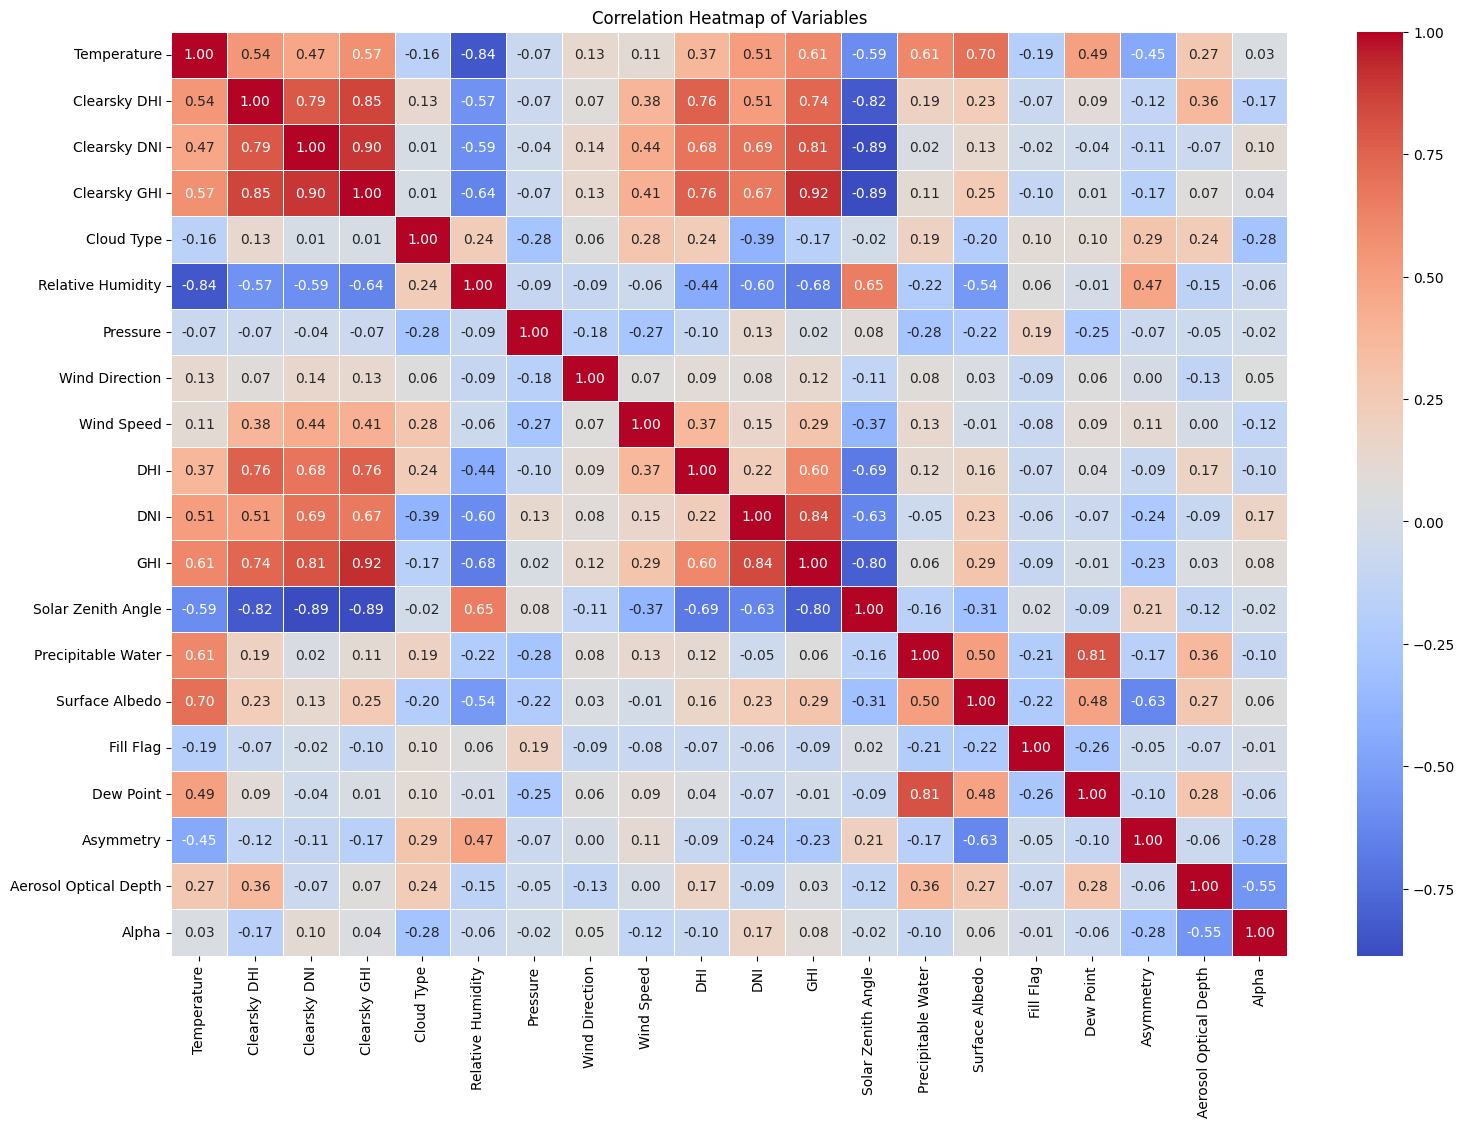

In [115]:
plt.figure(figsize=(18, 12))
correlation_matrix = dfp.drop(columns=['Point_Color']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

There is strong positive/negative corrleation between Target and other atributes

**Positive:**
1.   ClearSky GHI,DNI,DHI
2.   Temperature

**Negative:**
1.   Solar Zenith Angle
2.   Relative humidity







In [ ]:
def main():


main()


In [116]:
def get_astronomical_season(date):
    year = date.year
    spring_equinox = pd.Timestamp(f'{year}-03-20')
    summer_solstice = pd.Timestamp(f'{year}-06-21')
    autumn_equinox = pd.Timestamp(f'{year}-09-22')
    winter_solstice = pd.Timestamp(f'{year}-12-21')

    if date >= winter_solstice:
        return 'Winter 2023' # Winter for the end of 2022, leading into 2023
    elif date < spring_equinox:
        return 'Winter 2022' # Winter for the beginning of 2022, from 2021
    elif date >= spring_equinox and date < summer_solstice:
        return 'Spring'
    elif date >= summer_solstice and date < autumn_equinox:
        return 'Summer'
    elif date >= autumn_equinox and date < winter_solstice:
        return 'Autumn'
    else:
        return 'Unknown'

dfp['Season_Astronomical'] = dfp.index.map(get_astronomical_season)

dfp_winter_2022_astro = dfp[dfp['Season_Astronomical'] == 'Winter 2022']
dfp_winter_2023_astro = dfp[dfp['Season_Astronomical'] == 'Winter 2023']
dfp_spring_astro = dfp[dfp['Season_Astronomical'] == 'Spring']
dfp_summer_astro = dfp[dfp['Season_Astronomical'] == 'Summer']
dfp_autumn_astro = dfp[dfp['Season_Astronomical'] == 'Autumn']

print(f"Astronomical Winter 2022 data: First record: {dfp_winter_2022_astro.index.min()}, Last record: {dfp_winter_2022_astro.index.max()}")
print(f"Astronomical Winter 2023 data: First record: {dfp_winter_2023_astro.index.min()}, Last record: {dfp_winter_2023_astro.index.max()}")
print(f"Astronomical Spring data: First record: {dfp_spring_astro.index.min()}, Last record: {dfp_spring_astro.index.max()}")
print(f"Astronomical Summer data: First record: {dfp_summer_astro.index.min()}, Last record: {dfp_summer_astro.index.max()}")
print(f"Astronomical Autumn data: First record: {dfp_autumn_astro.index.min()}, Last record: {dfp_autumn_astro.index.max()}")

Astronomical Winter 2022 data: First record: 2022-01-01 00:30:00, Last record: 2022-03-19 23:30:00
Astronomical Winter 2023 data: First record: 2022-12-21 00:30:00, Last record: 2022-12-31 23:30:00
Astronomical Spring data: First record: 2022-03-20 00:30:00, Last record: 2022-06-20 23:30:00
Astronomical Summer data: First record: 2022-06-21 00:30:00, Last record: 2022-09-21 23:30:00
Astronomical Autumn data: First record: 2022-09-22 00:30:00, Last record: 2022-12-20 23:30:00


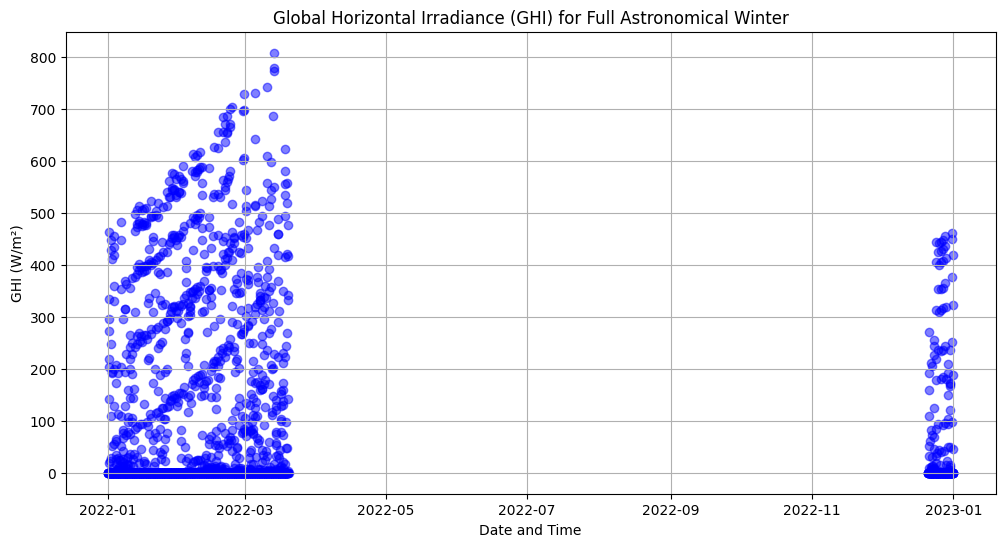

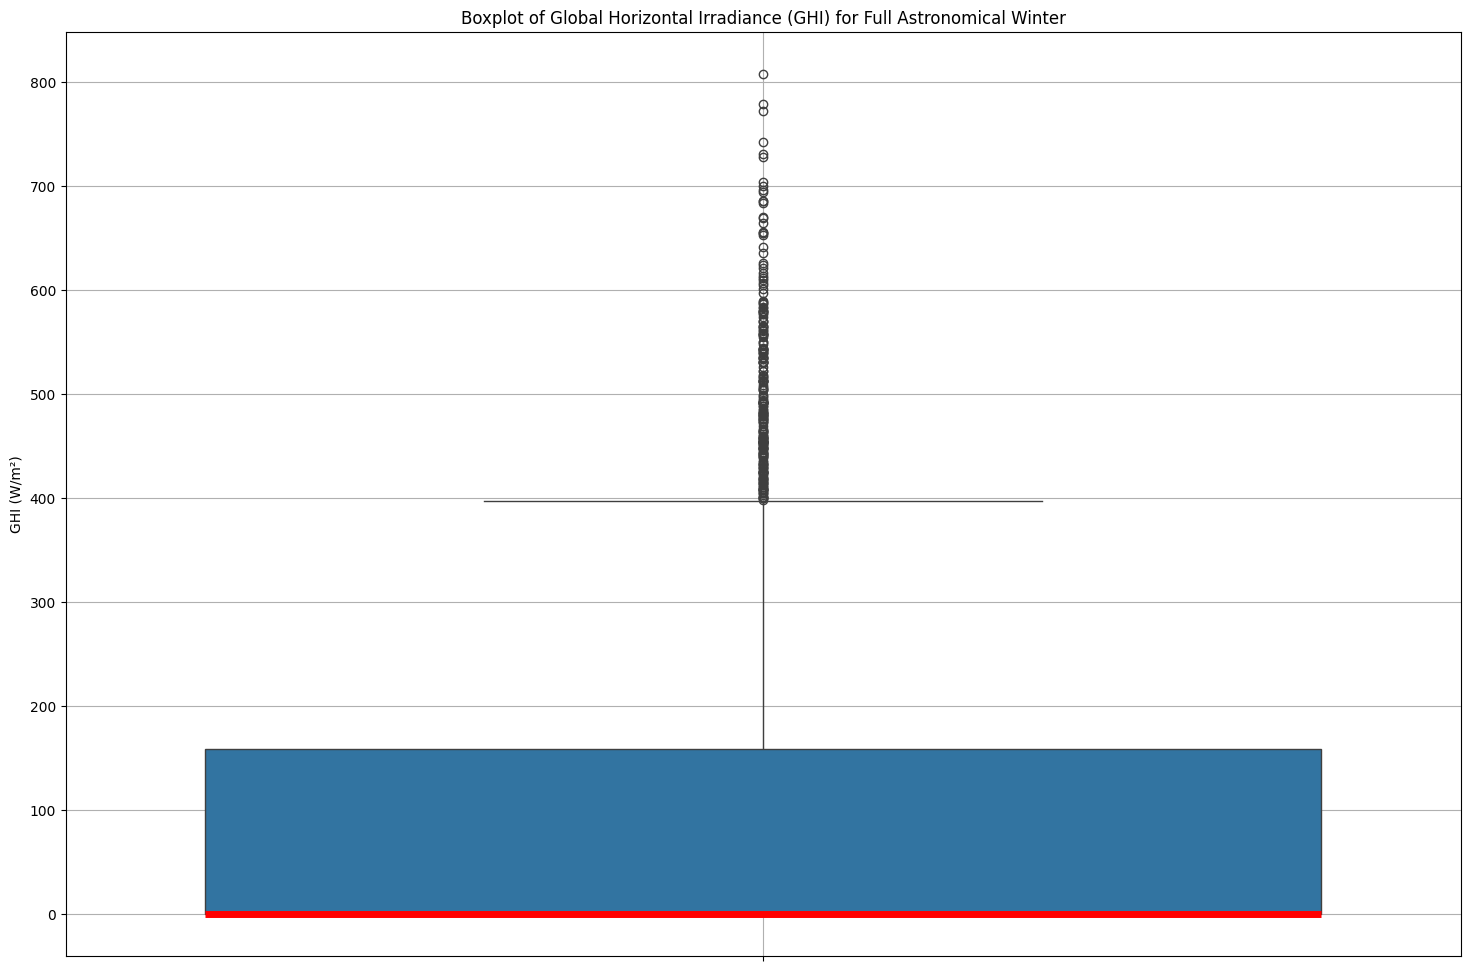

In [155]:


plt.figure(figsize=(12, 6))
plt.scatter(dfp_full_winter_period.index, dfp_full_winter_period['GHI'], alpha=0.5, color='blue')
plt.title('Global Horizontal Irradiance (GHI) for Full Astronomical Winter')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()
plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_full_winter_period['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI) for Full Astronomical Winter')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

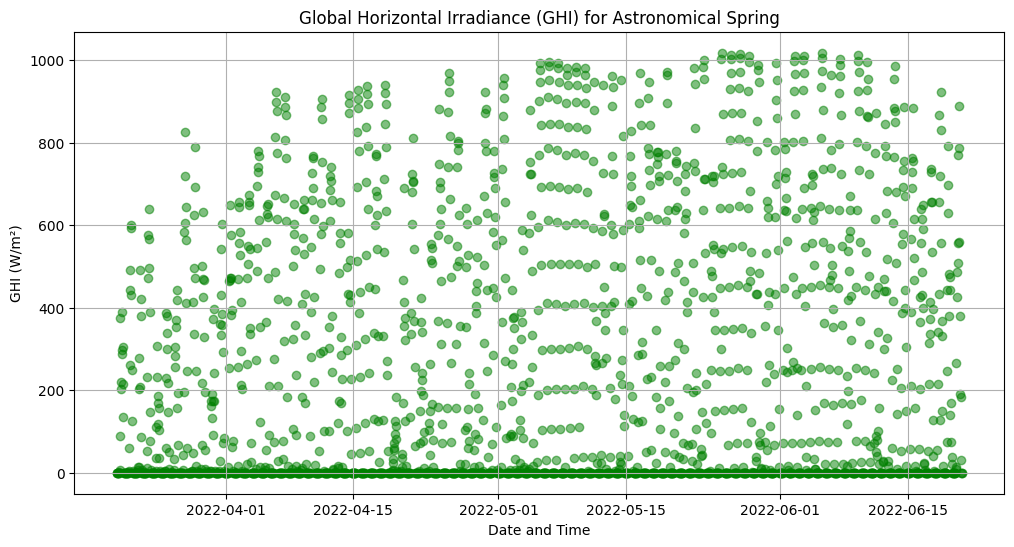

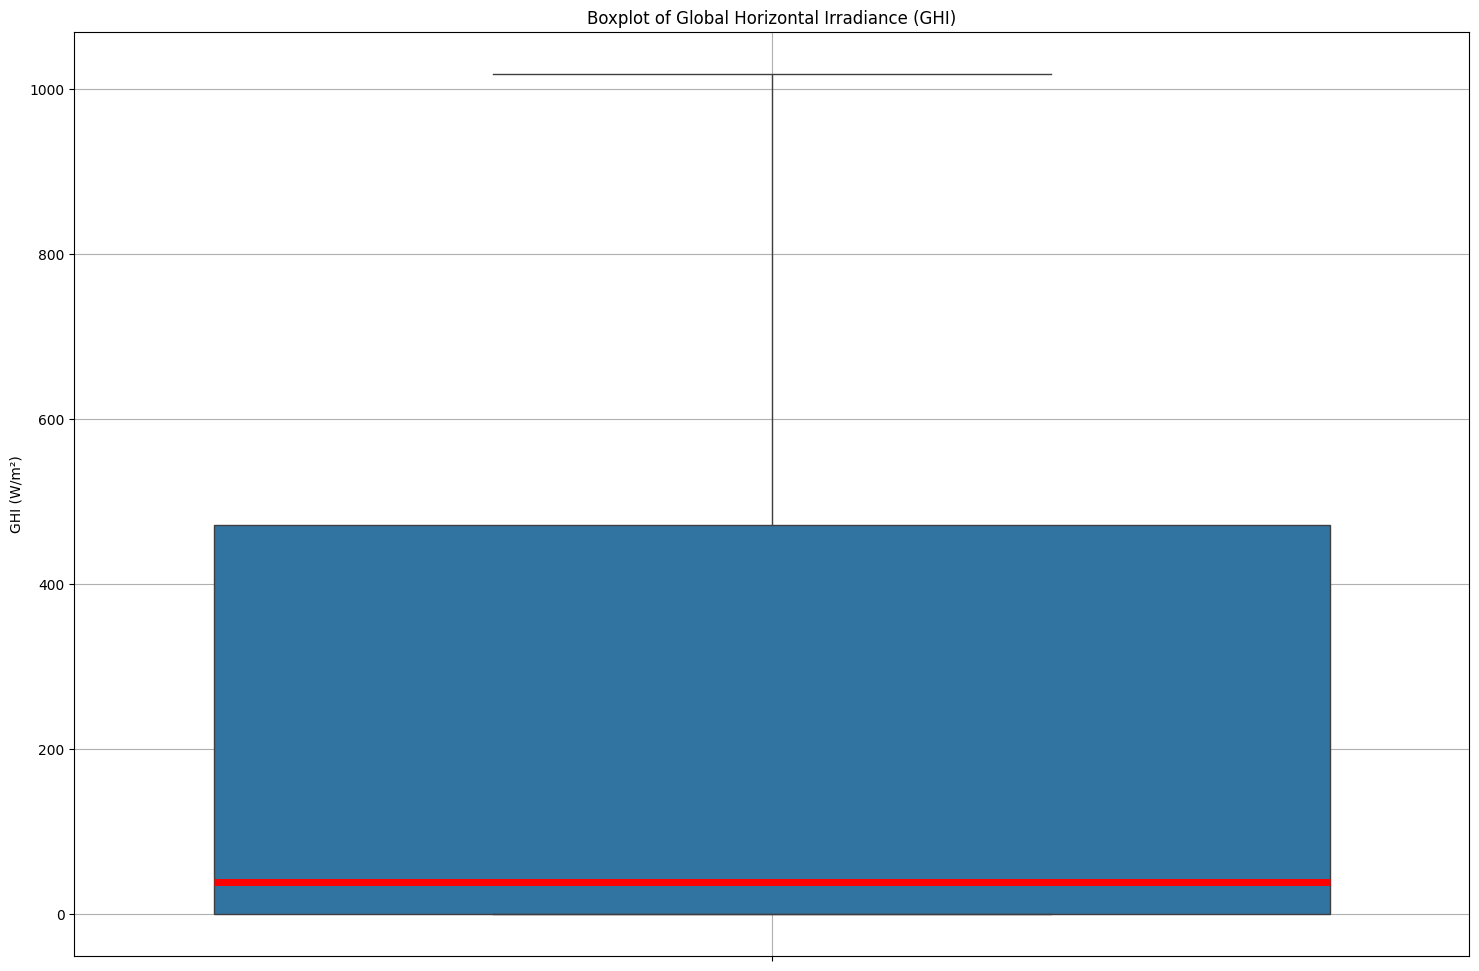

In [119]:
plt.figure(figsize=(12, 6))
plt.scatter(dfp_spring_astro.index, dfp_spring_astro['GHI'], alpha=0.5, color='green')
plt.title('Global Horizontal Irradiance (GHI) for Astronomical Spring')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_spring_astro['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

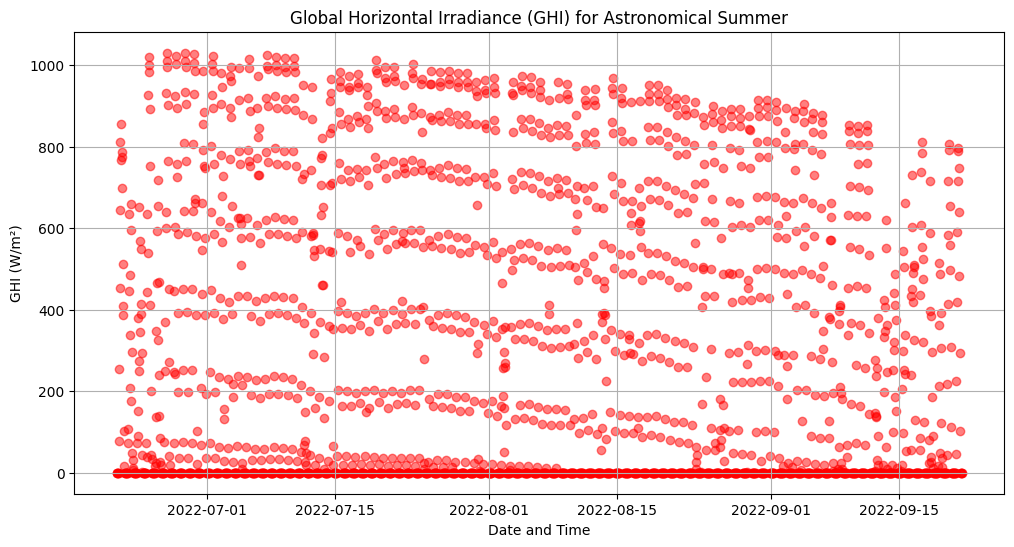

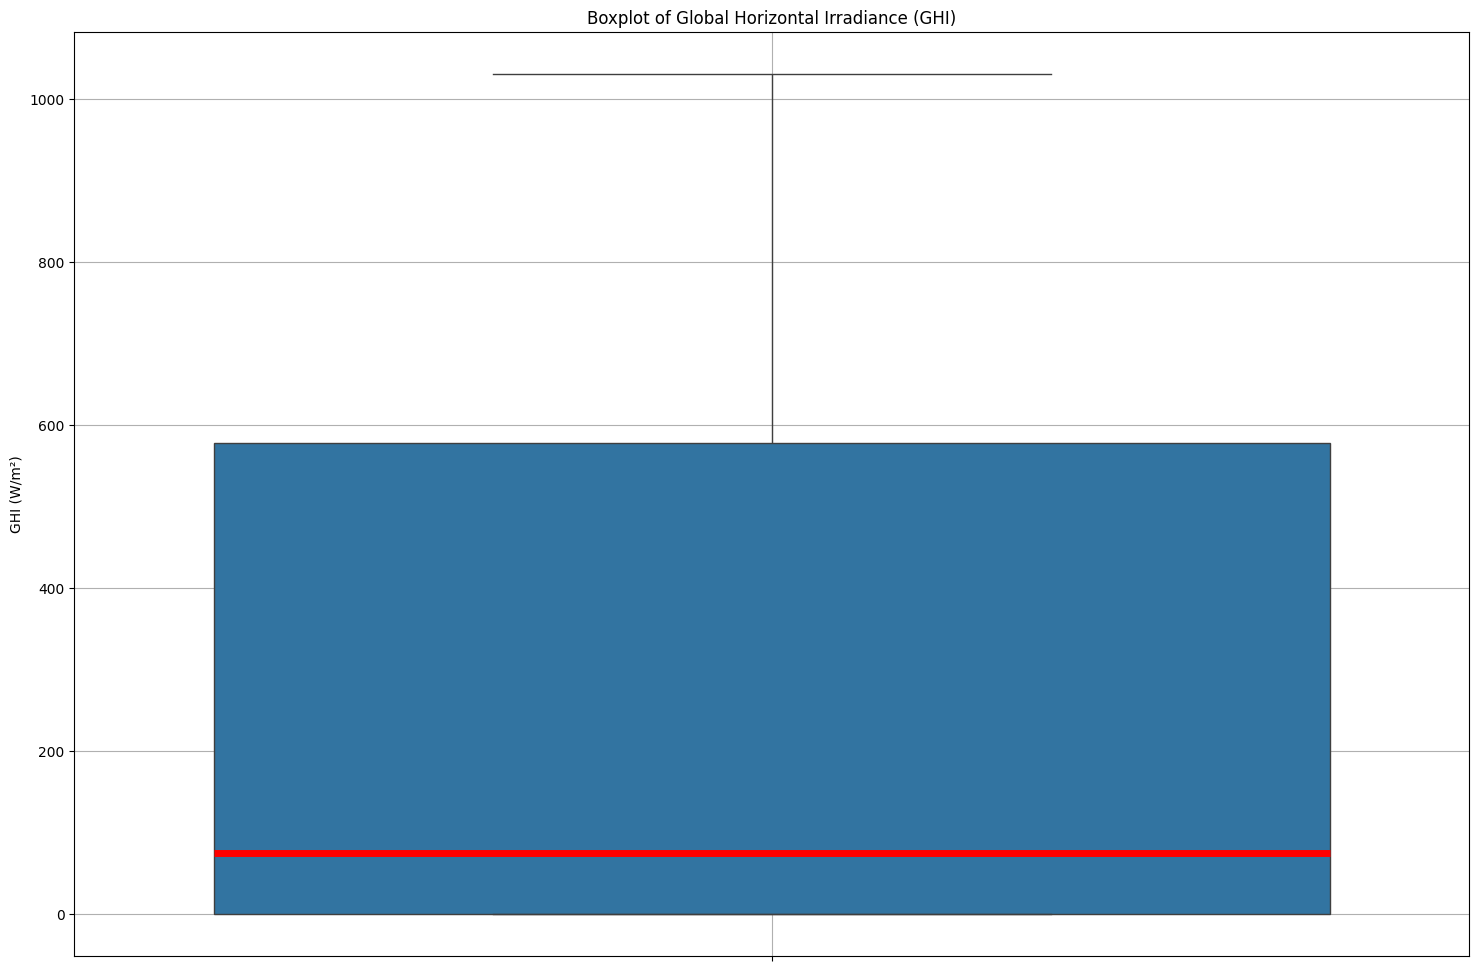

In [120]:
plt.figure(figsize=(12, 6))
plt.scatter(dfp_summer_astro.index, dfp_summer_astro['GHI'], alpha=0.5, color='red')
plt.title('Global Horizontal Irradiance (GHI) for Astronomical Summer')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_summer_astro['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()




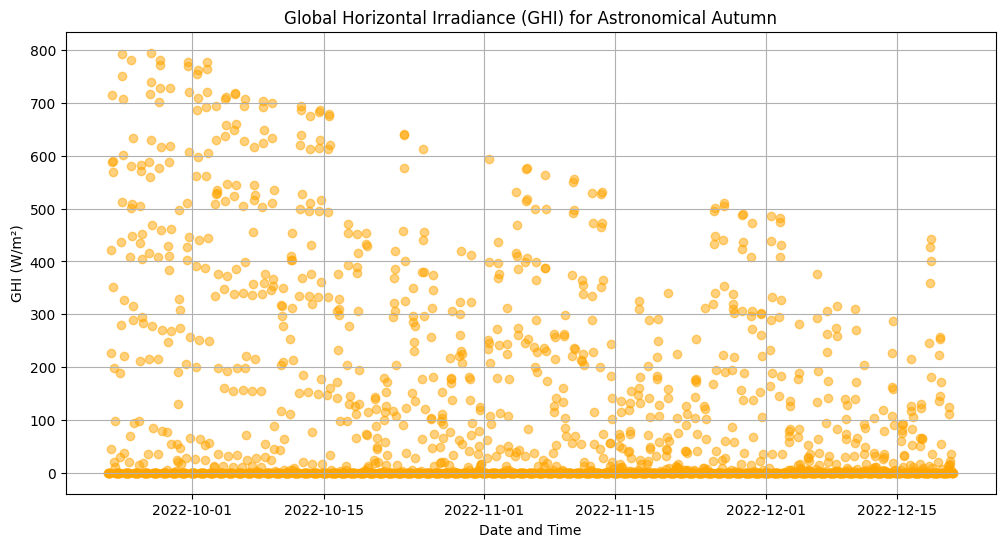

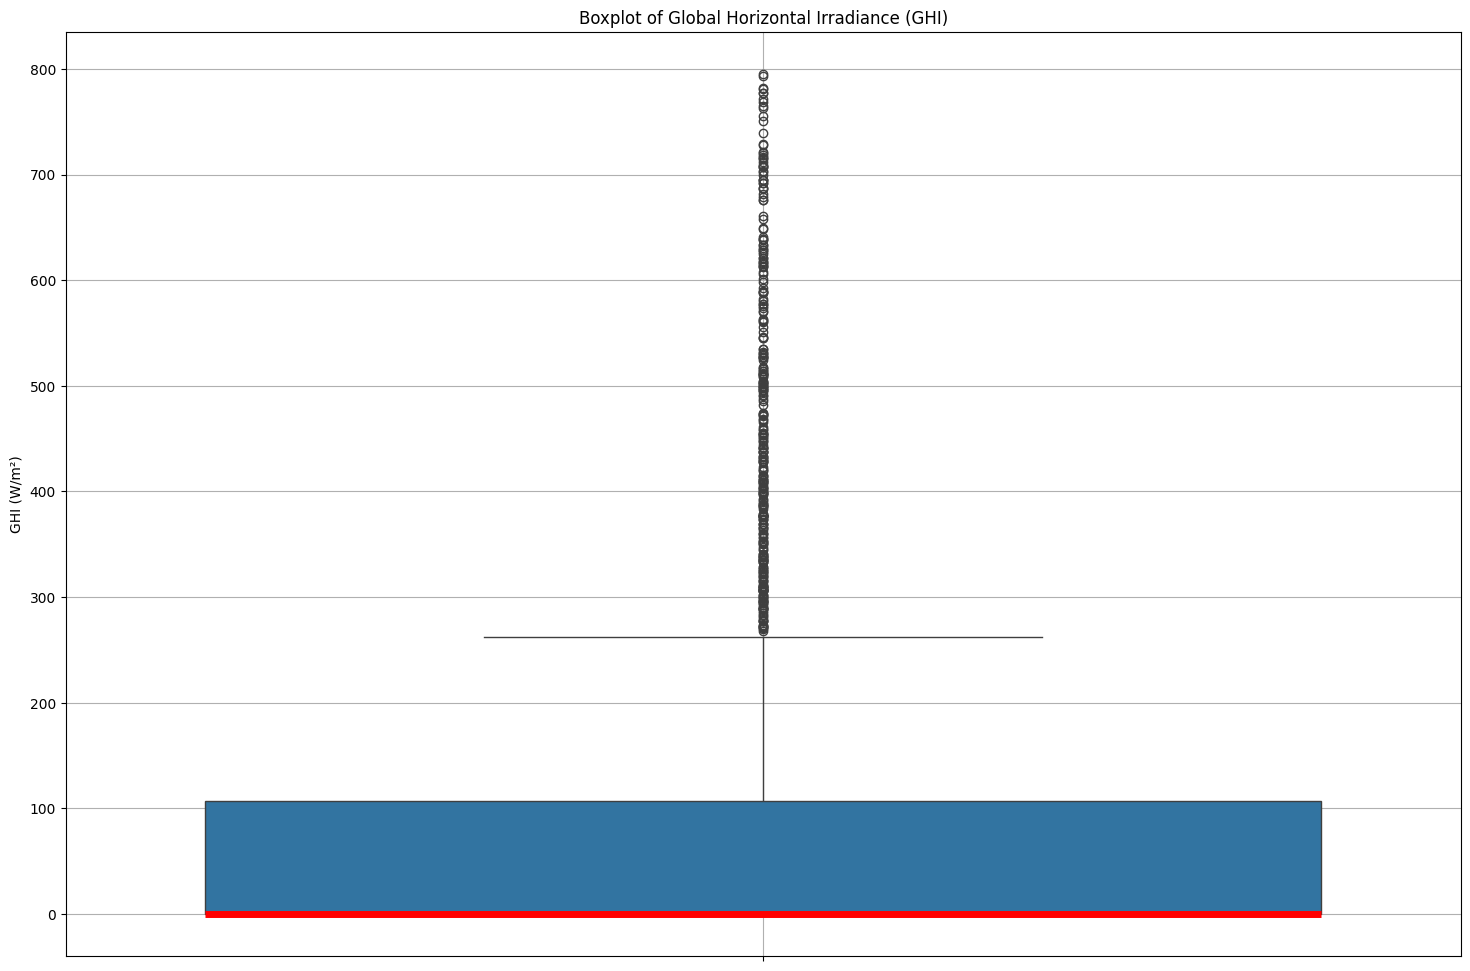

In [121]:

plt.figure(figsize=(12, 6))
plt.scatter(dfp_autumn_astro.index, dfp_autumn_astro['GHI'], alpha=0.5, color='orange')
plt.title('Global Horizontal Irradiance (GHI) for Astronomical Autumn')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_autumn_astro['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()



In [167]:
import datetime as dt

# Re-initialize dfp_winter_2023_astro to ensure a clean start with 2022 data
dfp_winter_2023_astro = dfp[dfp['Season_Astronomical'] == 'Winter 2023'].copy()

# Adjust the year for dfp_winter_2023_astro from 2022 to 2021
dfp_winter_2023_astro.index = dfp_winter_2023_astro.index.map(lambda x: x.replace(year=x.year - 1))

dfp_full_winter_period = pd.concat([dfp_winter_2023_astro, dfp_winter_2022_astro])
# Sort the index to ensure chronological order after concatenation
dfp_full_winter_period = dfp_full_winter_period.sort_index()

print("Modified dfp_winter_2023_astro head (year changed to 2021):")
print(dfp_winter_2023_astro.head())
print("\ndfp_full_winter_period head (after re-concatenation):")
print(dfp_full_winter_period.head())

Modified dfp_winter_2023_astro head (year changed to 2021):
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2021-12-21 00:30:00          6.8             0             0             0   
2021-12-21 01:30:00          6.8             0             0             0   
2021-12-21 02:30:00          6.8             0             0             0   
2021-12-21 03:30:00          6.9             0             0             0   
2021-12-21 04:30:00          7.0             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2021-12-21 00:30:00           0              99.88       914             234   
2021-12-21 01:30:00           8              98.73       914             232   
2021-12-21 02:30:00           7              97.97       914             

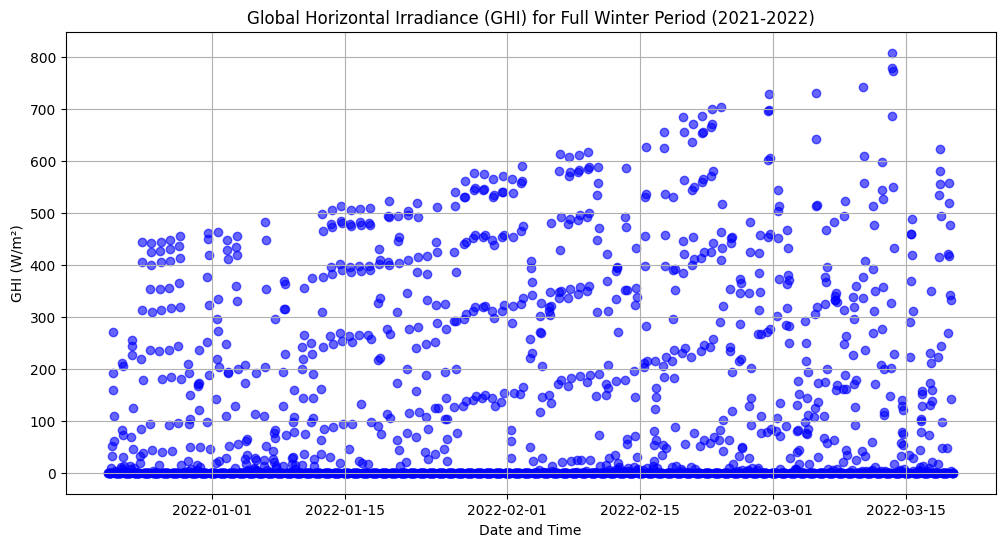

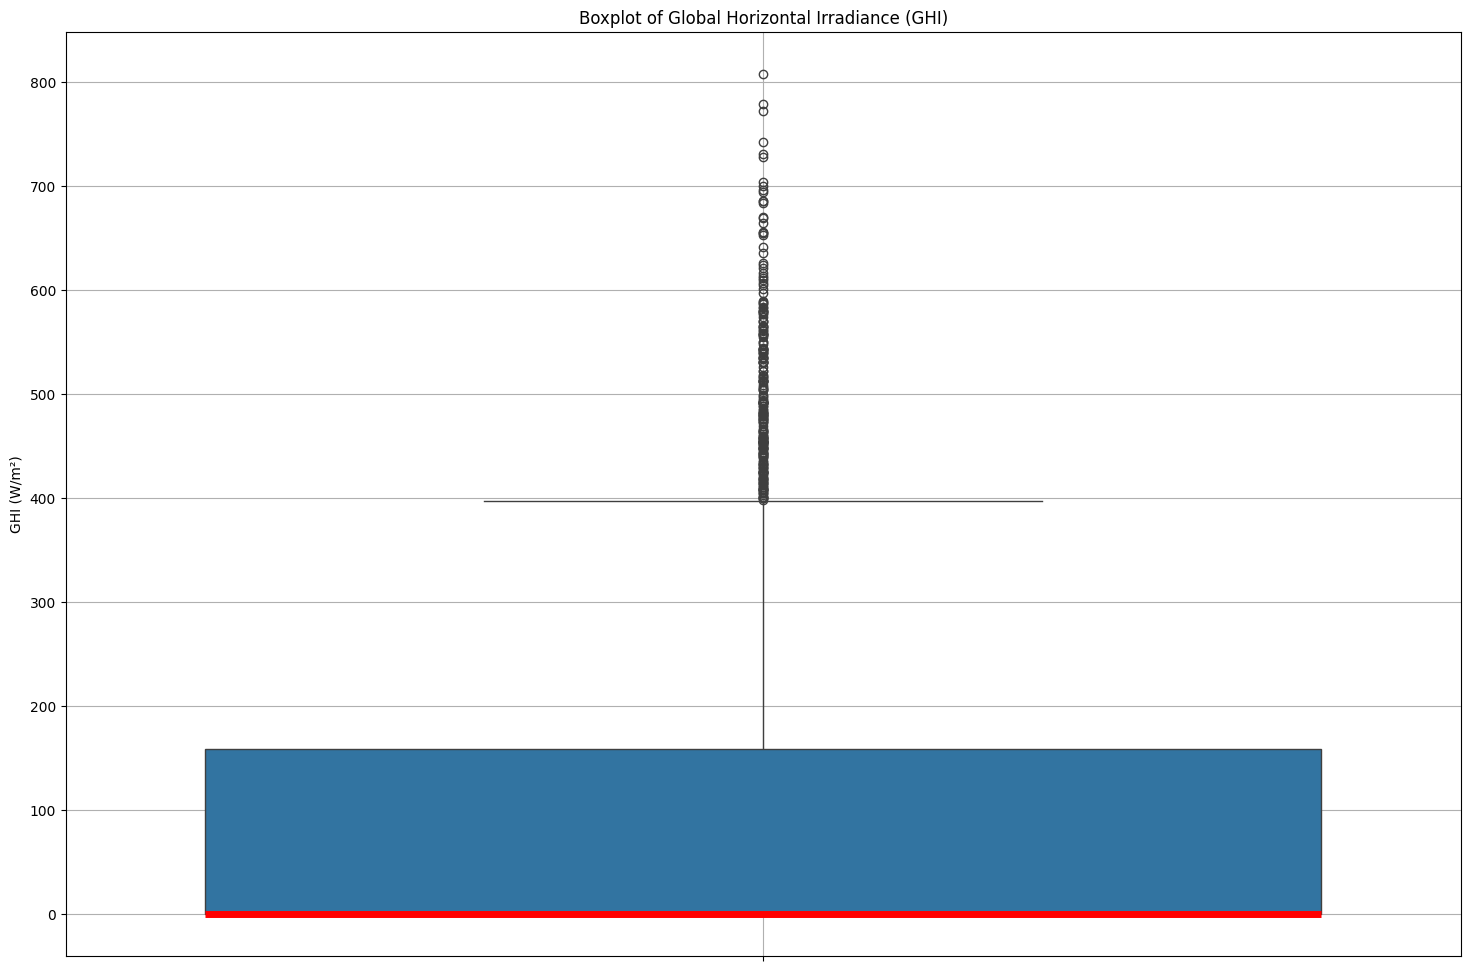

In [168]:


plt.figure(figsize=(12, 6))
plt.scatter(dfp_full_winter_period.index, dfp_full_winter_period['GHI'], alpha=0.6, color='blue')
plt.title('Global Horizontal Irradiance (GHI) for Full Winter Period (2021-2022)')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_full_winter_period['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

the winter season was spanning into two years which was making a huge time gap in our dataset so i decided to rool-back the year to 2021 in orde to avoid that time gag for a better training.

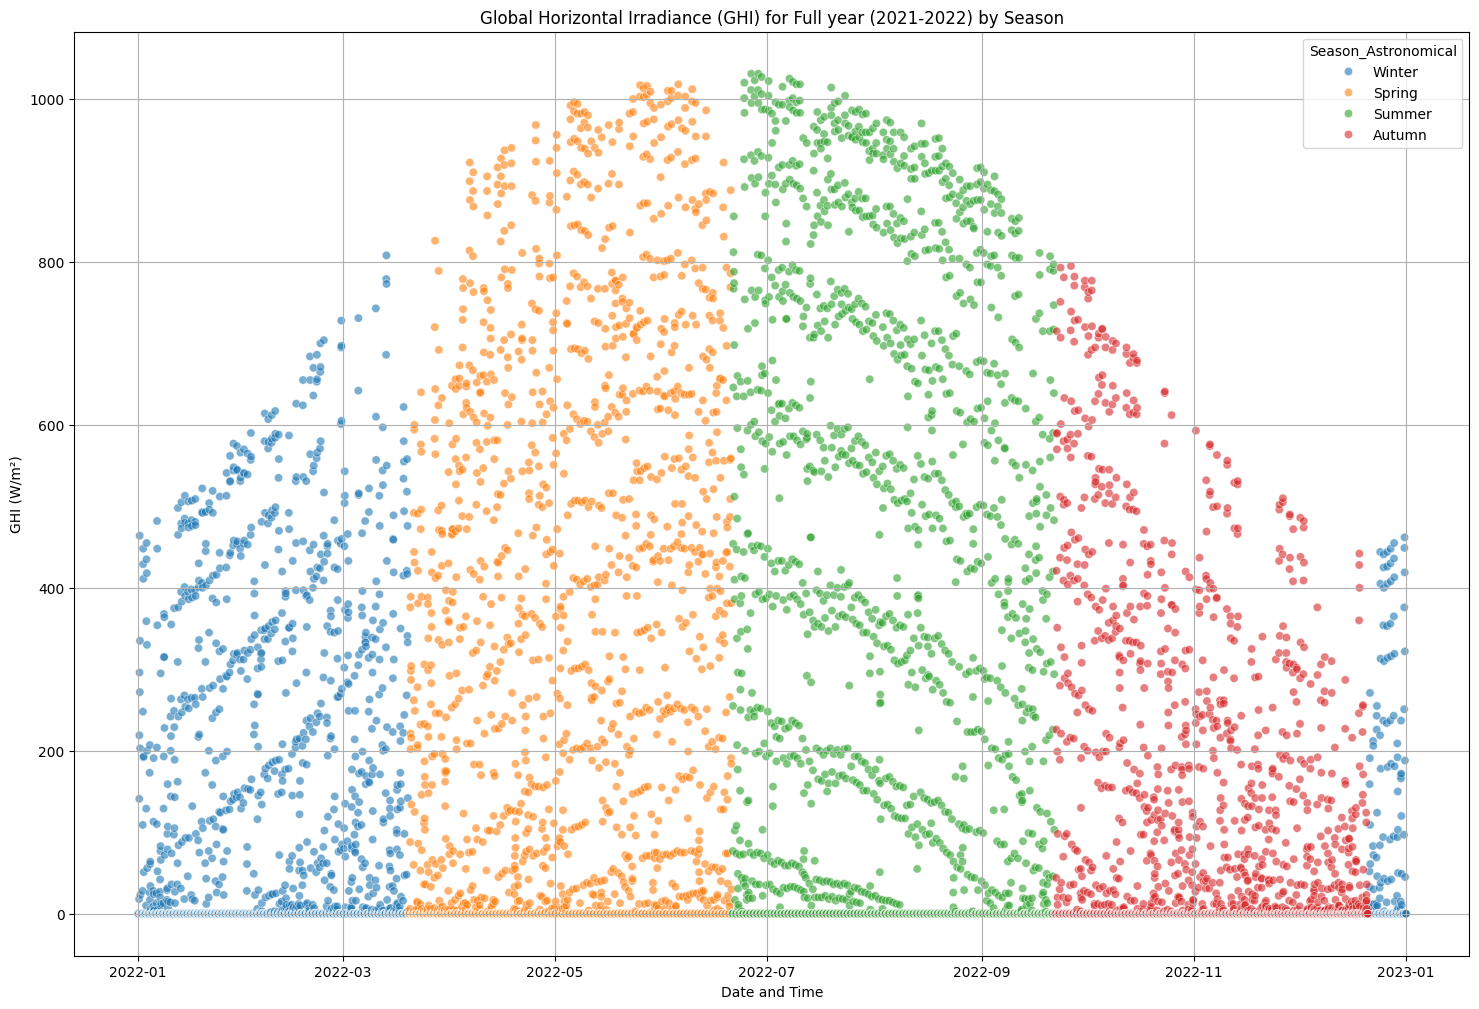

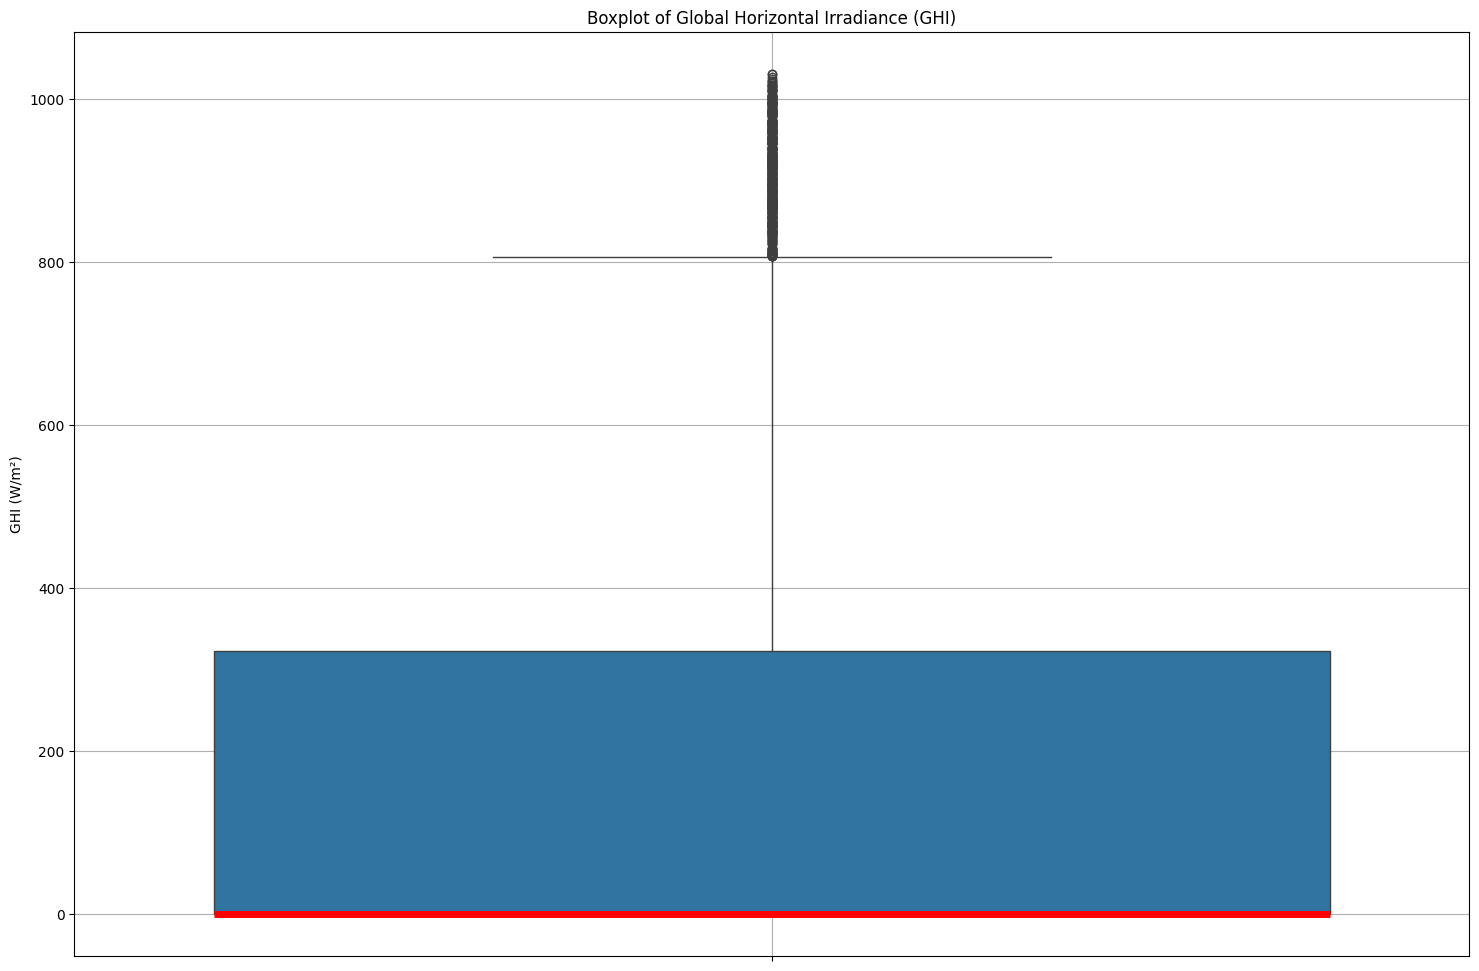

In [125]:
dfp_full_winter_period['Season_Astronomical'] = 'Winter' # Set all winter periods to a single 'Winter' label
dfp_whole_year= pd.concat([dfp_full_winter_period, dfp_spring_astro, dfp_summer_astro, dfp_autumn_astro])
plt.figure(figsize=(18, 12))
sns.scatterplot(data=dfp_whole_year, x=dfp_whole_year.index, y='GHI', hue='Season_Astronomical', alpha=0.6)
plt.title('Global Horizontal Irradiance (GHI) for Full year (2021-2022) by Season')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()



plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_whole_year['GHI'], medianprops={'color': 'red', 'linewidth': 5}) # Added red median line
plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()

now we have a dataset which start from late 2021 to late 2022 without any time any time gap

Average GHI for each Astronomical Season:
Season_Astronomical
Autumn     94.332870
Spring    242.944444
Summer    286.848566
Winter    103.919944
Name: GHI, dtype: float64


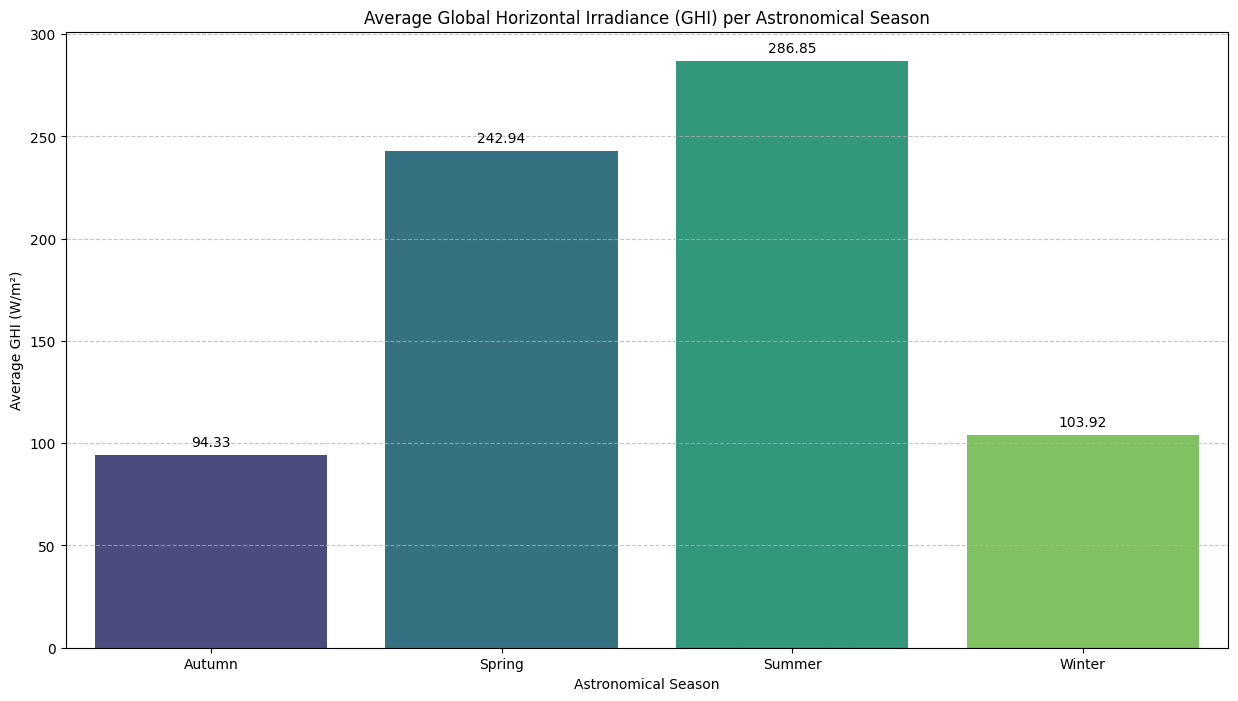

In [ ]:
average_ghi_per_season = dfp_whole_year.groupby('Season_Astronomical')['GHI'].mean()
print("Average GHI for each Astronomical Season:")
print(average_ghi_per_season)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=average_ghi_per_season.index, y=average_ghi_per_season.values, palette='viridis')
plt.title('Average Global Horizontal Irradiance (GHI) per Astronomical Season')
plt.xlabel('Astronomical Season')
plt.ylabel('Average GHI (W/m²)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the mean value on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for 'GHI'
ghi_outliers, ghi_lower_bound, ghi_upper_bound = detect_outliers_iqr(dfp_whole_year, 'GHI')

print(f"IQR Lower Bound for GHI: {ghi_lower_bound:.2f}")
print(f"IQR Upper Bound for GHI: {ghi_upper_bound:.2f}")
print(f"\nNumber of GHI outliers detected: {len(ghi_outliers)}")
print("\nFirst 10 GHI outliers:")
print(ghi_outliers['GHI'].head(100))

IQR Lower Bound for GHI: -484.50
IQR Upper Bound for GHI: 807.50

Number of GHI outliers detected: 463

First 10 GHI outliers:
DateTime
2022-03-13 13:30:00     808
2022-03-27 13:30:00     826
2022-04-06 11:30:00     814
2022-04-06 12:30:00     899
2022-04-06 13:30:00     922
                       ... 
2022-05-23 13:30:00    1000
2022-05-23 14:30:00     954
2022-05-25 12:30:00    1003
2022-05-25 13:30:00    1017
2022-05-25 15:30:00     869
Name: GHI, Length: 100, dtype: int64


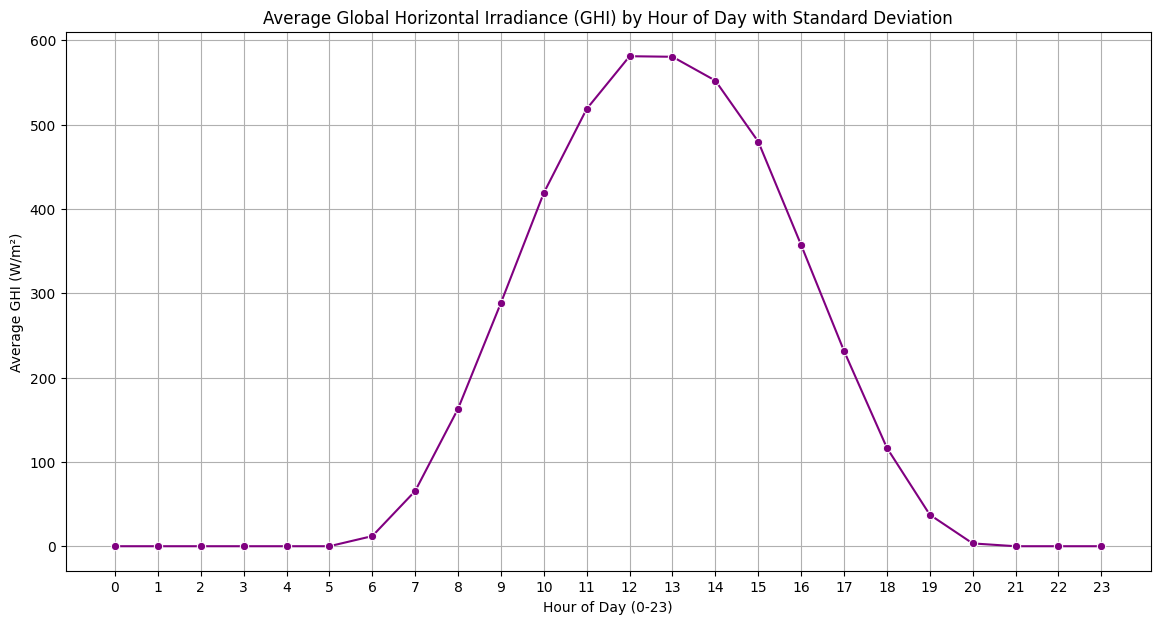

Average GHI per hour:
DateTime
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6      11.994521
7      65.463014
8     163.030137
9     288.594521
10    419.027397
11    518.591781
12    581.052055
13    580.400000
14    552.123288
15    479.783562
16    357.186301
17    231.561644
18    116.610959
19     37.358904
20      3.331507
21      0.000000
22      0.000000
23      0.000000


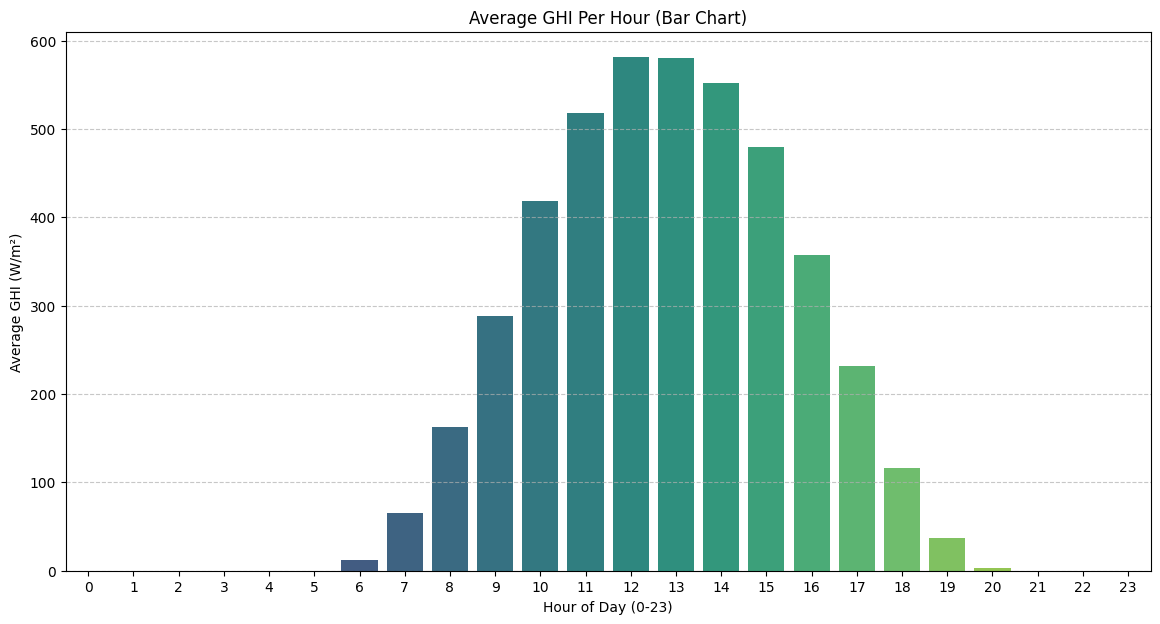

In [ ]:
hourly_ghi_avg = dfp_whole_year.groupby(dfp_whole_year.index.hour)['GHI'].mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=hourly_ghi_avg.index, y=hourly_ghi_avg.values, marker='o', color='purple', errorbar='sd', err_kws={'facecolor': 'lightcoral', 'alpha': 0.4})
plt.title('Average Global Horizontal Irradiance (GHI) by Hour of Day with Standard Deviation')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

print("Average GHI per hour:")
print(hourly_ghi_avg.to_string())


plt.figure(figsize=(14, 7))
sns.barplot(x=hourly_ghi_avg.index, y=hourly_ghi_avg.values, palette='viridis')
plt.title('Average GHI Per Hour (Bar Chart)')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Average GHI (W/m²)')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

Number of NaN values in ghi_interpolated after all filling: 0


<Figure size 1800x1200 with 0 Axes>

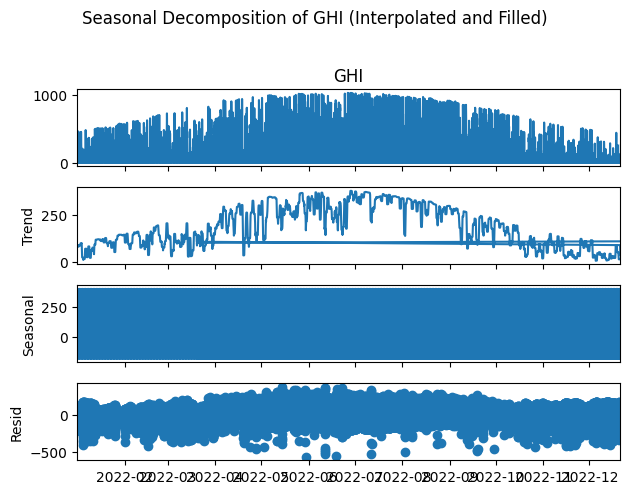

In [126]:
# Interpolate NaN values to make the series continuous for decomposition
ghi_interpolated = dfp_whole_year['GHI'].interpolate(method='time')

# Fill any remaining NaNs (e.g., at the beginning/end) with a suitable value, like 0 for GHI
ghi_interpolated = ghi_interpolated.fillna(0) # Filling remaining NaNs with 0

# Verify no NaNs remain
print(f"Number of NaN values in ghi_interpolated after all filling: {ghi_interpolated.isnull().sum()}")

# Perform seasonal decomposition (assuming daily seasonality, 24 hourly periods)
decomposition = seasonal_decompose(ghi_interpolated, model='additive', period=24)

# Plot the decomposed components
plt.figure(figsize=(18, 12))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of GHI (Interpolated and Filled)', y=1.02) # Add a suptitle for the entire figure
plt.tight_layout()
plt.show()

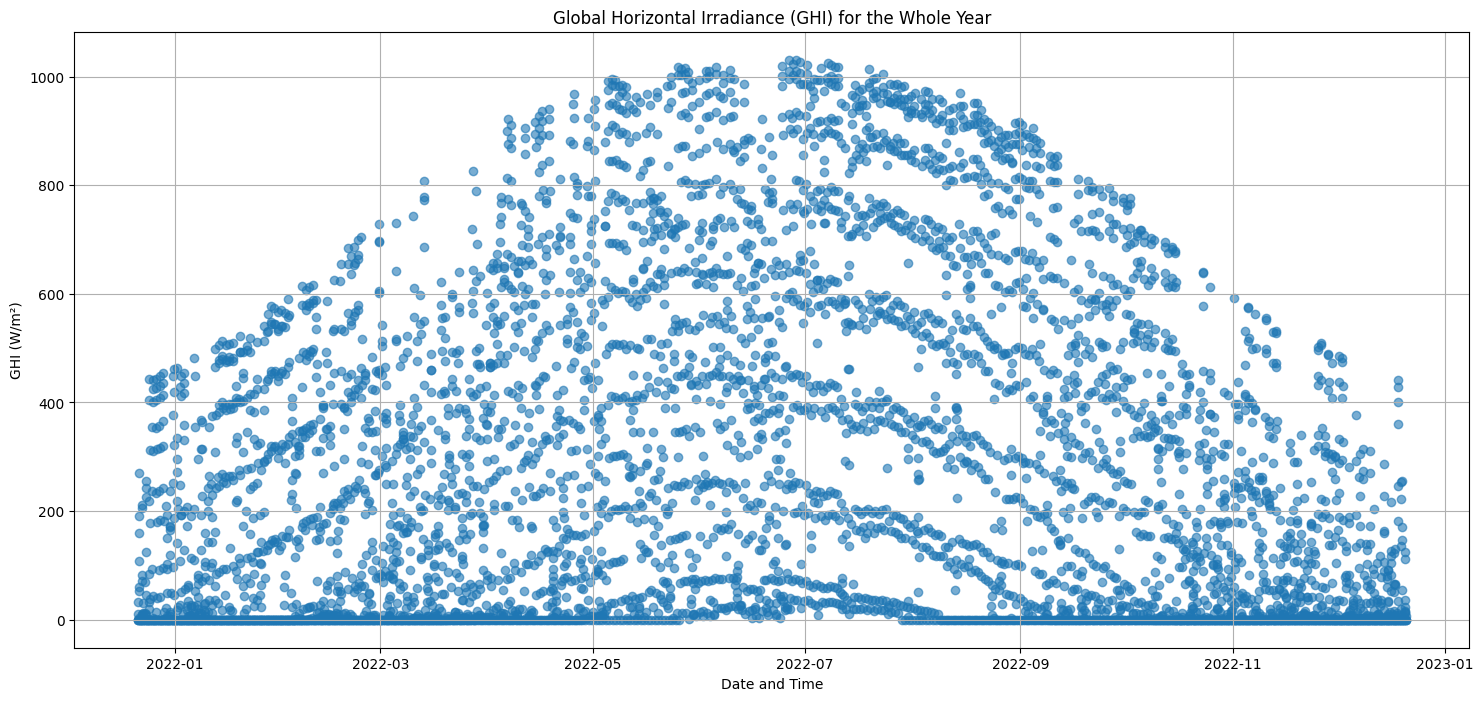

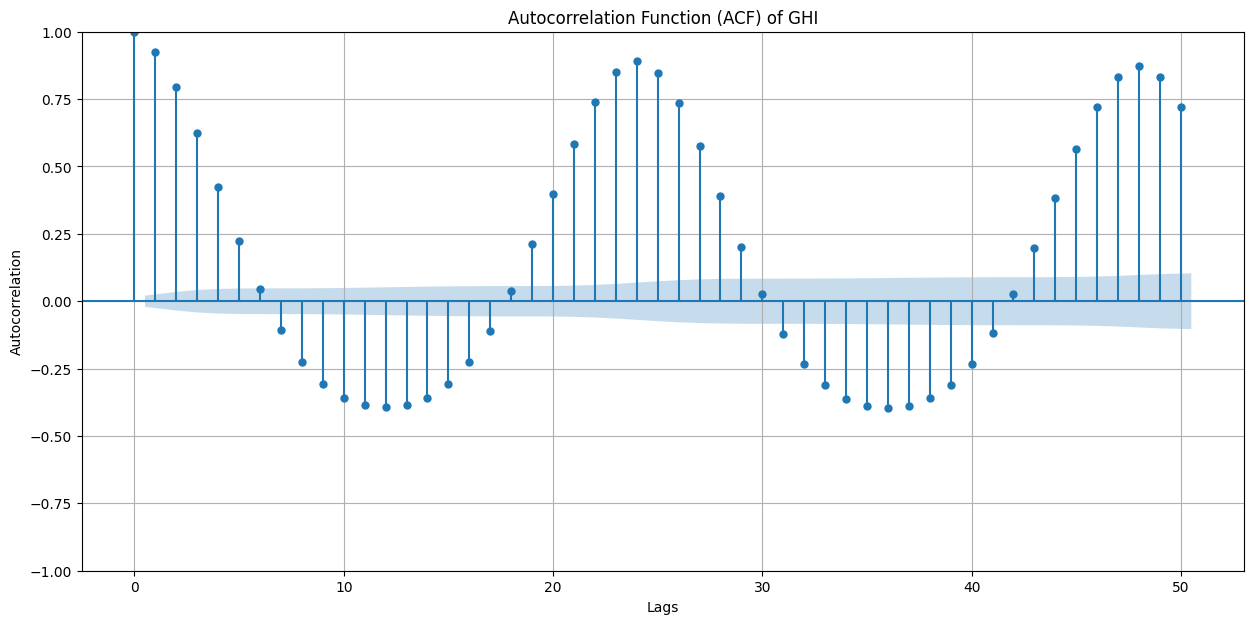

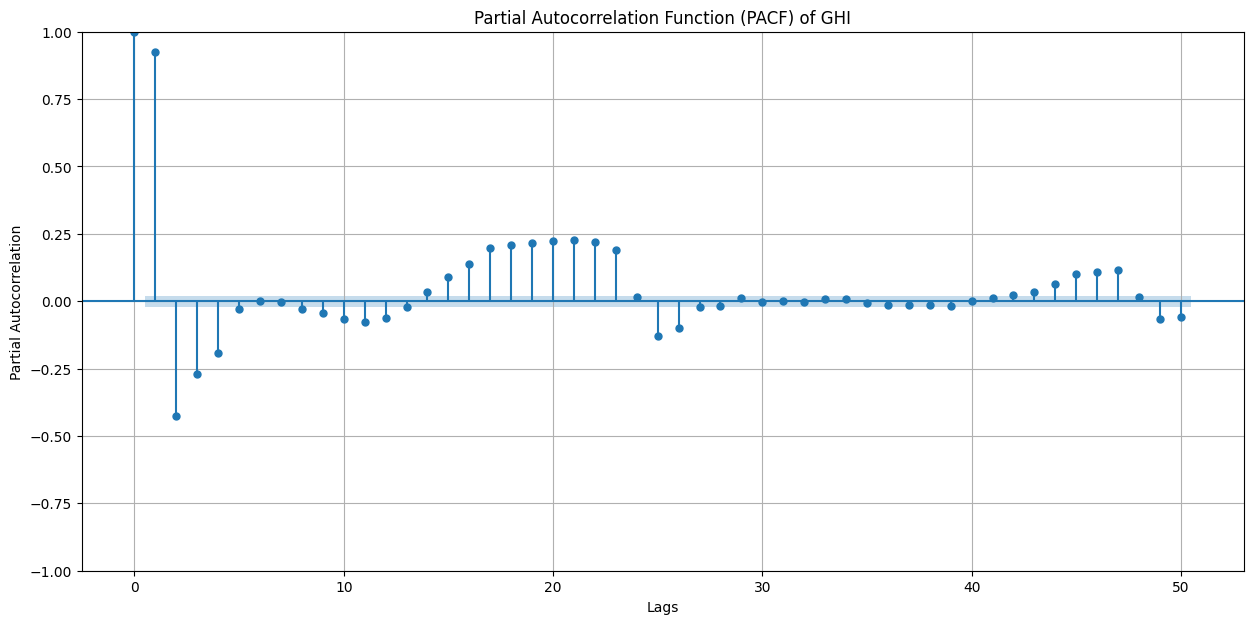

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(15, 7))
plot_acf(ghi_interpolated, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of GHI')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(15, 7))
plot_pacf(ghi_interpolated, lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of GHI')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [ ]:
# Identify hours to fill (00:00 to 05:00 and 21:00 to 23:00)
night_hours_mask = (
    (dfp_whole_year.index.hour >= 0) & (dfp_whole_year.index.hour <= 5) |
    (dfp_whole_year.index.hour >= 21) & (dfp_whole_year.index.hour <= 23)
)

# Set GHI to NaN for these hours
dfp_whole_year.loc[night_hours_mask, 'GHI'] = np.nan # Correctly setting to NaN using numpy



In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for 'GHI'
ghi_outliers, ghi_lower_bound, ghi_upper_bound = detect_outliers_iqr(dfp_whole_year, 'GHI')

print(f"IQR Lower Bound for GHI: {ghi_lower_bound:.2f}")
print(f"IQR Upper Bound for GHI: {ghi_upper_bound:.2f}")
print(f"\nNumber of GHI outliers detected: {len(ghi_outliers)}")
print("\nFirst 10 GHI outliers:")
print(ghi_outliers['GHI'].head(100))

IQR Lower Bound for GHI: 0.00
IQR Upper Bound for GHI: 1251.25

Number of GHI outliers detected: 0

First 10 GHI outliers:
Series([], Name: GHI, dtype: float64)


i set my lower_bound maximum to "0" which is physically the lowest value that could be recorded for GHI and with this approach we have no more outliers but we allso filled all of night time values "21pm-05am" filled with NaN instead of 0s.

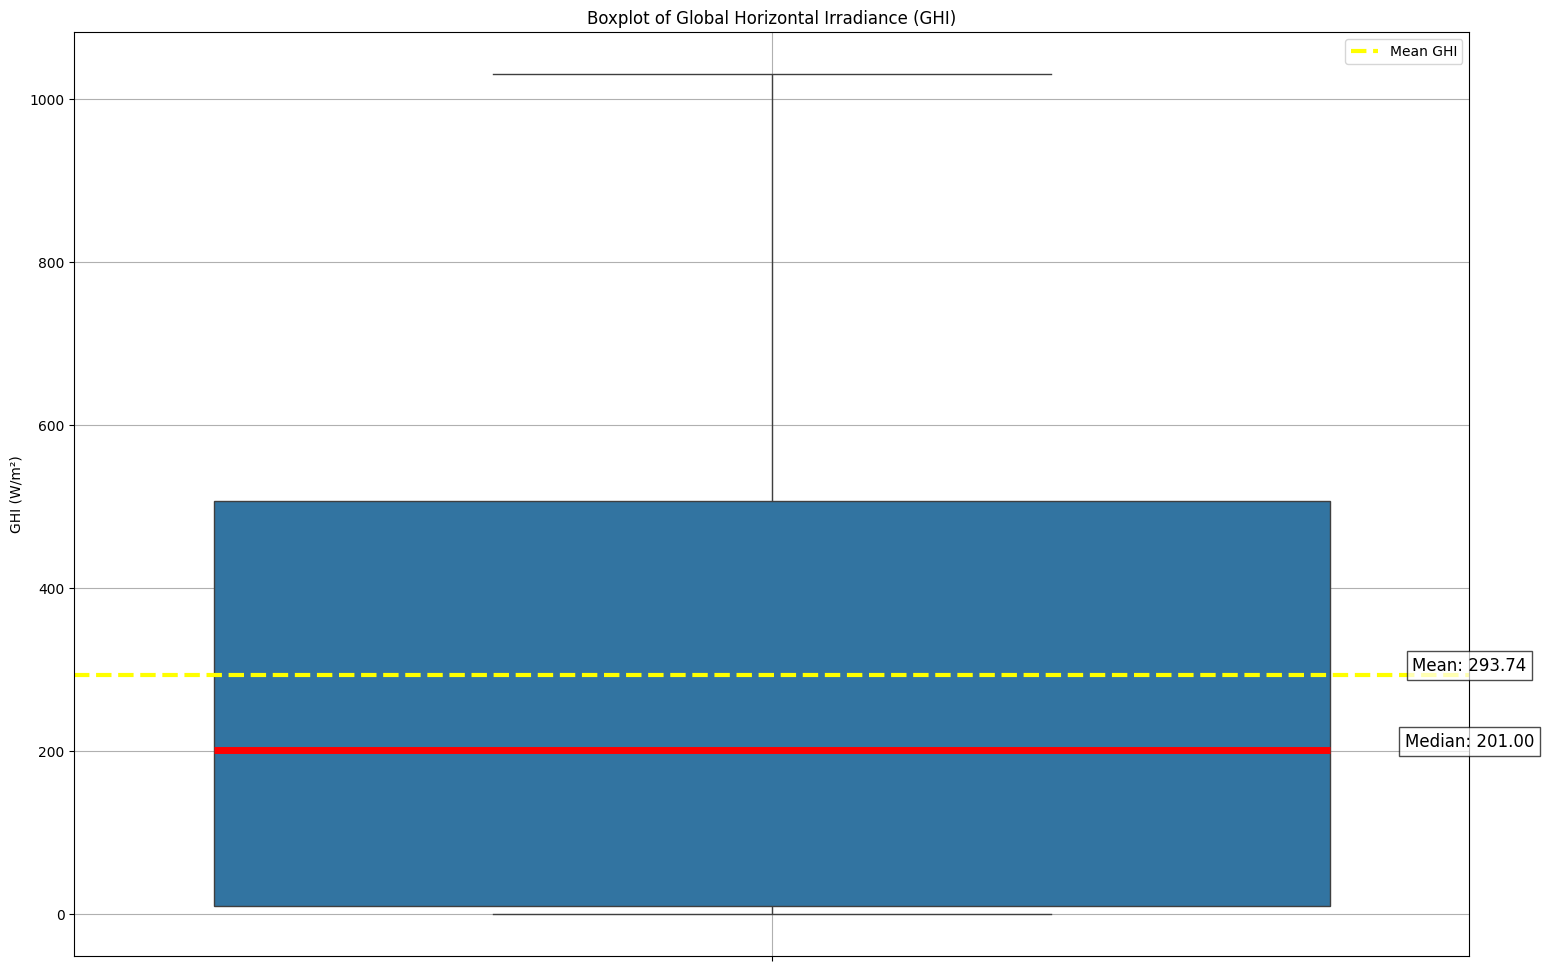

In [ ]:
plt.figure(figsize=(18, 12))
sns.boxplot(y=dfp_whole_year['GHI'], medianprops={'color': 'red', 'linewidth': 5})
plt.axhline(dfp_whole_year['GHI'].mean(), color='yellow', linestyle='--', linewidth=3, label='Mean GHI')

median_ghi = dfp_whole_year['GHI'].median()
mean_ghi = dfp_whole_year['GHI'].mean()

# Annotate median
plt.text(0.5, median_ghi, f'Median: {median_ghi:.2f}', color='black',
         ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Annotate mean
plt.text(0.5, mean_ghi, f'Mean: {mean_ghi:.2f}', color='black',
         ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.title('Boxplot of Global Horizontal Irradiance (GHI)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.legend()
plt.show()

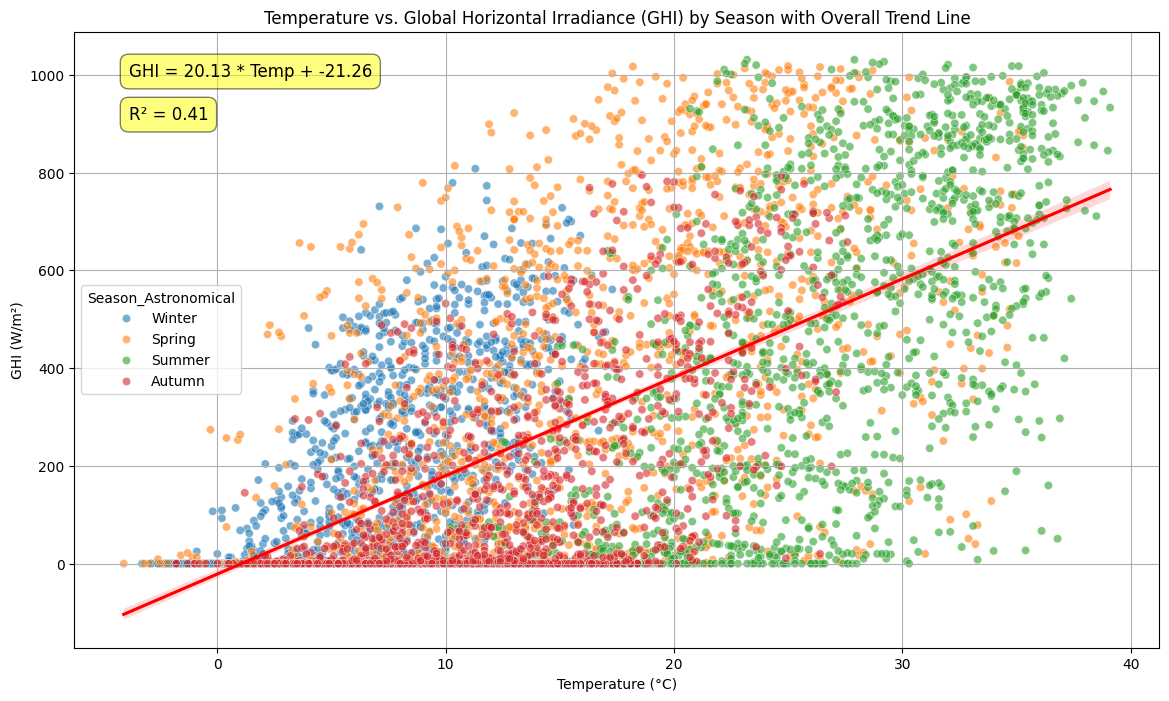

In [ ]:
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(data=dfp_whole_year, x='Temperature', y='GHI', hue='Season_Astronomical', alpha=0.6)
sns.regplot(data=dfp_whole_year, x='Temperature', y='GHI', scatter=False, color='red', ax=ax) # Overlay trend line without plotting scatter points again

plt.title('Temperature vs. Global Horizontal Irradiance (GHI) by Season with Overall Trend Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)

# Prepare text for annotation using the values from the previous linear regression calculation
# Ensure these variables (slope, intercept, r_value) are available in the kernel state
equation_text = f'GHI = {slope:.2f} * Temp + {intercept:.2f}'
r_squared_text = f'R² = {r_value**2:.2f}'

# Add text to the plot
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
plt.text(0.05, 0.88, r_squared_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.show()

In [127]:
# First, reset the index to make 'DateTime' a regular column
dfp_temp = dfp_whole_year.reset_index()

# Now, select the columns you want
neue_datenpunkte = dfp_temp[['DateTime', 'Temperature', 'GHI']] # Example: selecting DateTime, GHI, and Temperature

print(neue_datenpunkte.head(25))

              DateTime  Temperature  GHI
0  2022-01-01 00:30:00          4.9    0
1  2022-01-01 01:30:00          5.2    0
2  2022-01-01 02:30:00          5.3    0
3  2022-01-01 03:30:00          5.3    0
4  2022-01-01 04:30:00          5.3    0
5  2022-01-01 05:30:00          5.2    0
6  2022-01-01 06:30:00          5.1    0
7  2022-01-01 07:30:00          4.7    0
8  2022-01-01 08:30:00          5.2    0
9  2022-01-01 09:30:00          7.7   18
10 2022-01-01 10:30:00         11.3  141
11 2022-01-01 11:30:00         13.9  219
12 2022-01-01 12:30:00         15.5  296
13 2022-01-01 13:30:00         16.7  464
14 2022-01-01 14:30:00         16.7  272
15 2022-01-01 15:30:00         15.4  335
16 2022-01-01 16:30:00         12.4  203
17 2022-01-01 17:30:00          9.7   23
18 2022-01-01 18:30:00          8.7    0
19 2022-01-01 19:30:00          8.5    0
20 2022-01-01 20:30:00          8.5    0
21 2022-01-01 21:30:00          8.4    0
22 2022-01-01 22:30:00          7.9    0
23 2022-01-01 23

**Normalization**


Apply Min-Max normalization and Z-score standardization to the 'GHI' and 'Temperature' columns in the `dfp_whole_year` DataFrame, storing the results in new columns named 'GHI_minmax', 'Temperature_minmax', 'GHI_zscore', and 'Temperature_zscore', then display the head of the DataFrame and descriptive statistics for the new columns.

In [133]:
selected_columns = dfp_whole_year[['GHI', 'Temperature']]
print("Selected 'GHI' and 'Temperature' columns:")
print(selected_columns.head())

Selected 'GHI' and 'Temperature' columns:
                     GHI  Temperature
DateTime                             
2022-01-01 00:30:00    0          4.9
2022-01-01 01:30:00    0          5.2
2022-01-01 02:30:00    0          5.3
2022-01-01 03:30:00    0          5.3
2022-01-01 04:30:00    0          5.3


In [134]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to 'GHI' and 'Temperature'
dfp_whole_year[['GHI_minmax', 'Temperature_minmax']] = min_max_scaler.fit_transform(dfp_whole_year[['GHI', 'Temperature']])

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Apply Z-score standardization to 'GHI' and 'Temperature'
dfp_whole_year[['GHI_zscore', 'Temperature_zscore']] = standard_scaler.fit_transform(dfp_whole_year[['GHI', 'Temperature']])

print("DataFrame head with new normalized/standardized columns:")
print(dfp_whole_year.head())

print("\nDescriptive statistics for normalized and standardized columns:")
print(dfp_whole_year[['GHI_minmax', 'Temperature_minmax', 'GHI_zscore', 'Temperature_zscore']].describe())

DataFrame head with new normalized/standardized columns:
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2022-01-01 00:30:00          4.9             0             0             0   
2022-01-01 01:30:00          5.2             0             0             0   
2022-01-01 02:30:00          5.3             0             0             0   
2022-01-01 03:30:00          5.3             0             0             0   
2022-01-01 04:30:00          5.3             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2022-01-01 00:30:00           1              69.27       914             172   
2022-01-01 01:30:00           4              57.26       918             183   
2022-01-01 02:30:00           0              55.49       919             184

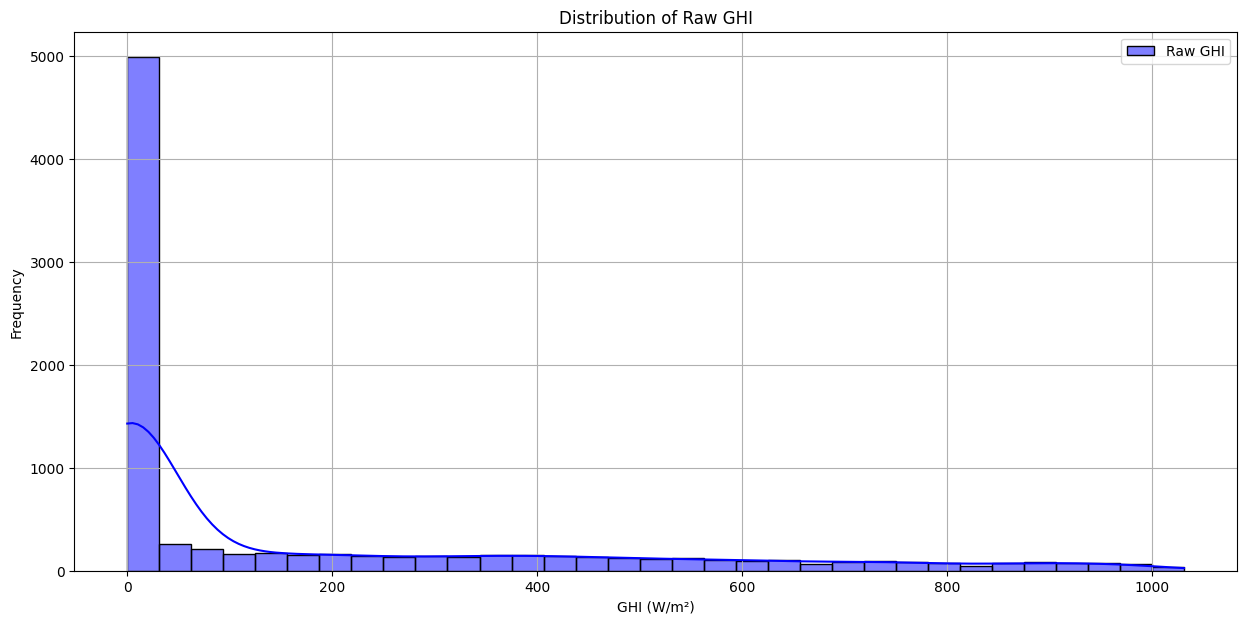

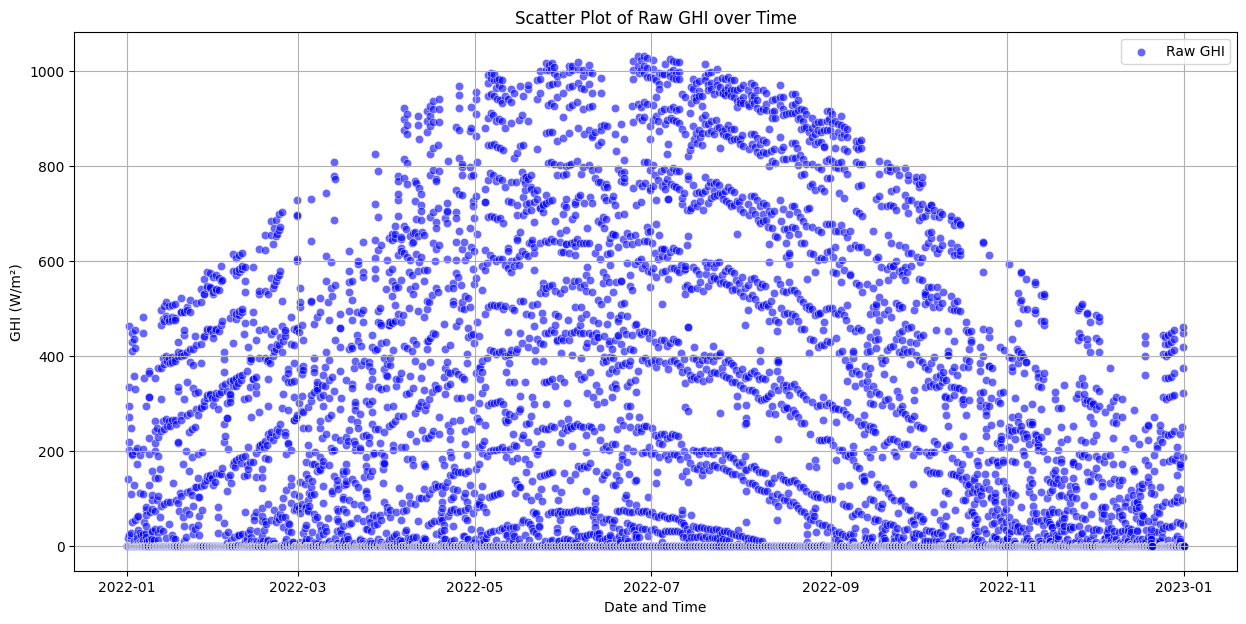

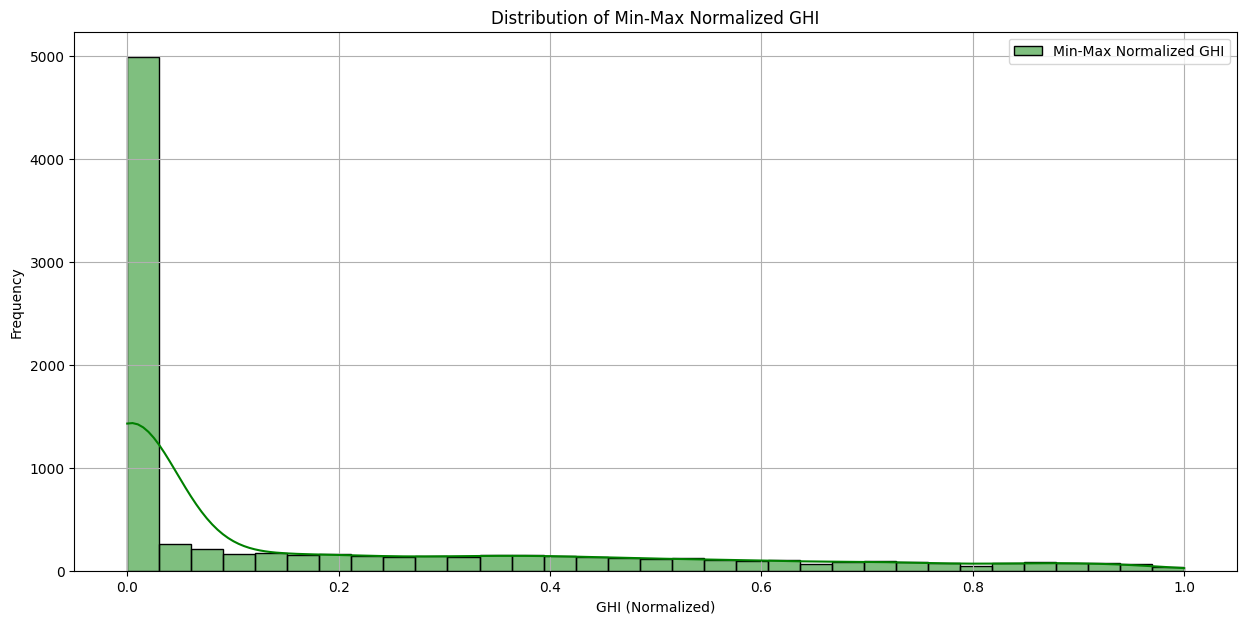

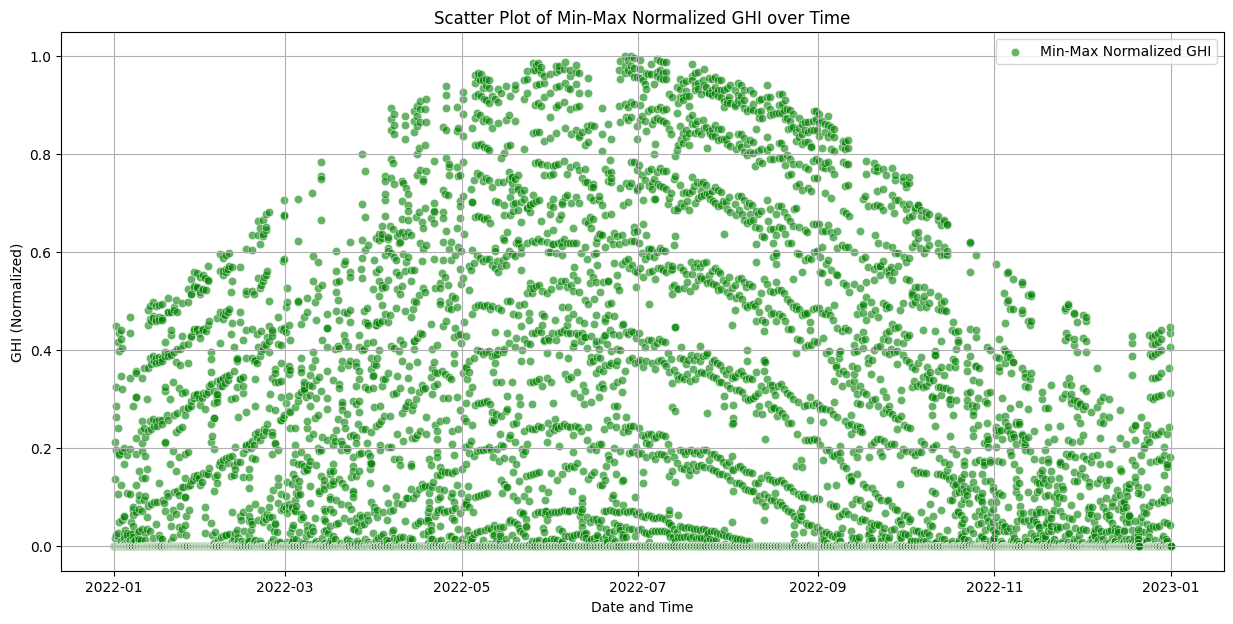

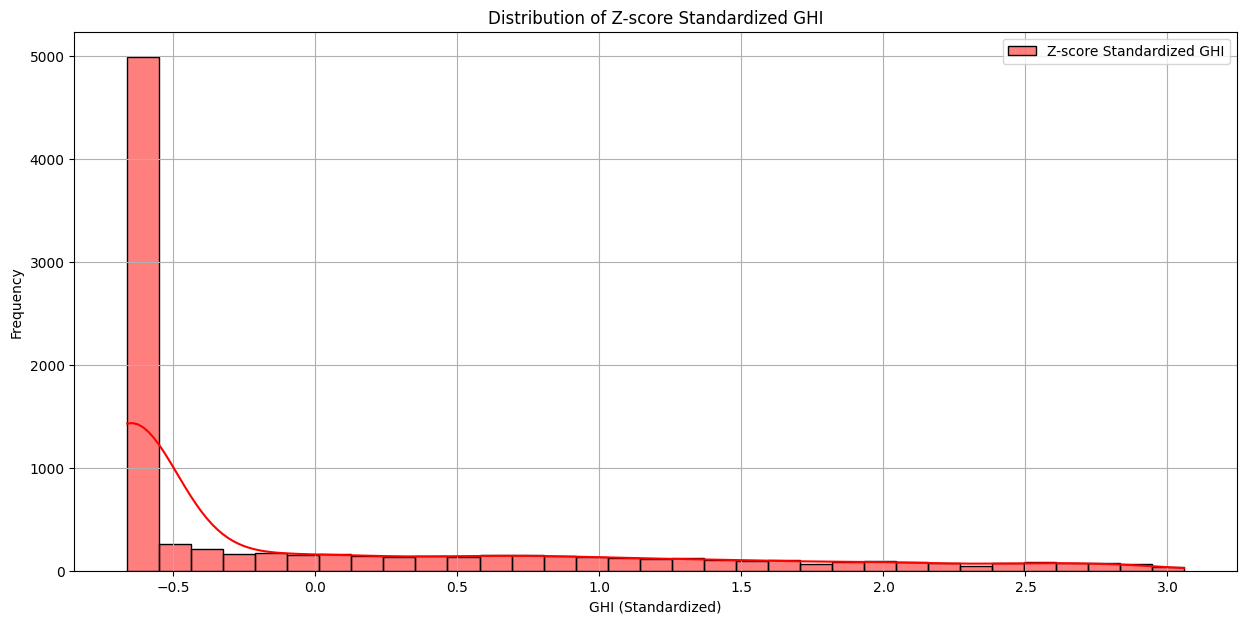

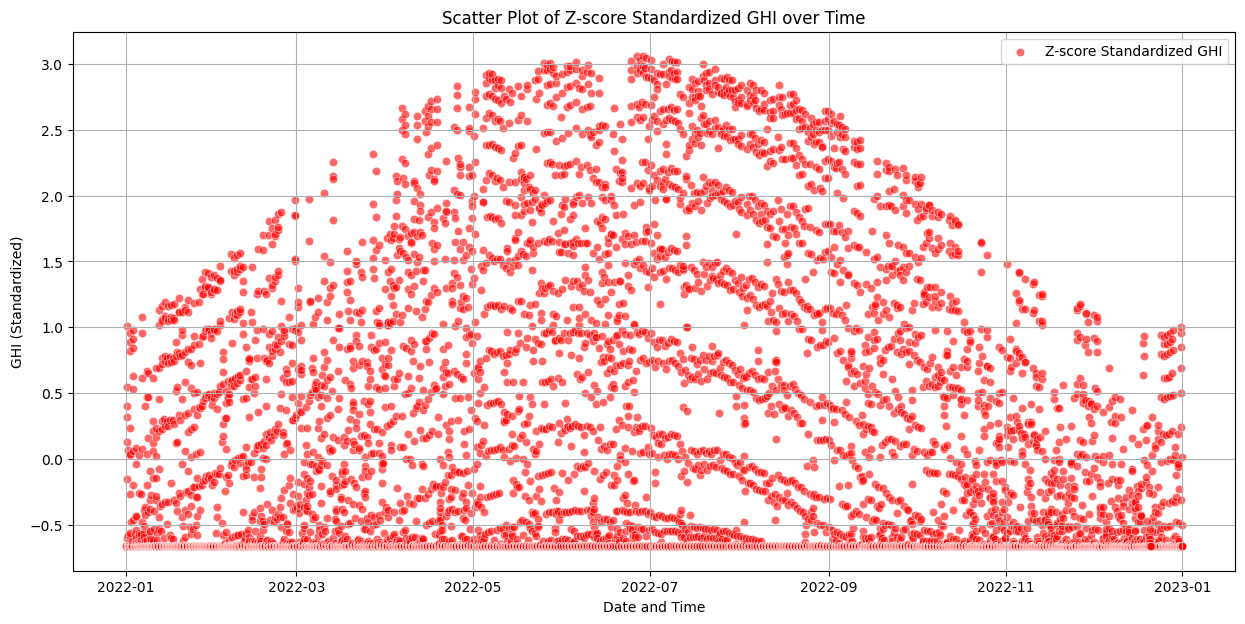

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Distribution of Raw GHI
sns.histplot(dfp_whole_year['GHI'].dropna(), kde=True, color='blue', label='Raw GHI')
plt.title('Distribution of Raw GHI')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
# Scatter plot of Raw GHI
sns.scatterplot(x=dfp_whole_year.index, y=dfp_whole_year['GHI'].dropna(), color='blue', alpha=0.6, label='Raw GHI')
plt.title('Scatter Plot of Raw GHI over Time')
plt.xlabel('Date and Time')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
# Distribution of Min-Max Normalized GHI
sns.histplot(dfp_whole_year['GHI_minmax'].dropna(), kde=True, color='green', label='Min-Max Normalized GHI')
plt.title('Distribution of Min-Max Normalized GHI')
plt.xlabel('GHI (Normalized)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
# Scatter plot of Min-Max Normalized GHI
sns.scatterplot(x=dfp_whole_year.index, y=dfp_whole_year['GHI_minmax'].dropna(), color='green', alpha=0.6, label='Min-Max Normalized GHI')
plt.title('Scatter Plot of Min-Max Normalized GHI over Time')
plt.xlabel('Date and Time')
plt.ylabel('GHI (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
# Distribution of Z-score Standardized GHI
sns.histplot(dfp_whole_year['GHI_zscore'].dropna(), kde=True, color='red', label='Z-score Standardized GHI')
plt.title('Distribution of Z-score Standardized GHI')
plt.xlabel('GHI (Standardized)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 7))
# Scatter plot of Z-score Standardized GHI
sns.scatterplot(x=dfp_whole_year.index, y=dfp_whole_year['GHI_zscore'].dropna(), color='red', alpha=0.6, label='Z-score Standardized GHI')
plt.title('Scatter Plot of Z-score Standardized GHI over Time')
plt.xlabel('Date and Time')
plt.ylabel('GHI (Standardized)')
plt.legend()
plt.grid(True)
plt.show()

**adf-test**

In [137]:
from statsmodels.tsa.stattools import adfuller

def run_adf_test(series, name):
    print(f"\n--- ADF Test for {name} ---")
    # Drop NaN values before performing the ADF test
    series_clean = series.dropna()
    if series_clean.empty:
        print("Series is empty after dropping NaNs, cannot perform ADF test.")
        return

    result = adfuller(series_clean)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05: # p-value <= 0.05 indicates stationarity
        print("Result: The series is likely stationary (reject H0)")
    else:
        print("Result: The series is likely non-stationary (fail to reject H0)")

# Run ADF test on Raw GHI
run_adf_test(dfp_whole_year['GHI'], 'Raw GHI')

# Run ADF test on Min-Max Normalized GHI
run_adf_test(dfp_whole_year['GHI_minmax'], 'Min-Max Normalized GHI')

# Run ADF test on Z-score Standardized GHI
run_adf_test(dfp_whole_year['GHI_zscore'], 'Z-score Standardized GHI')


--- ADF Test for Raw GHI ---
ADF Statistic: -5.697389
p-value: 0.000001
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Result: The series is likely stationary (reject H0)

--- ADF Test for Min-Max Normalized GHI ---
ADF Statistic: -5.697389
p-value: 0.000001
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Result: The series is likely stationary (reject H0)

--- ADF Test for Z-score Standardized GHI ---
ADF Statistic: -5.697389
p-value: 0.000001
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Result: The series is likely stationary (reject H0)



Calculate and visualize the 24-hour rolling mean and standard deviation of 'GHI' for each astronomical season (winter, spring, summer, and autumn) using the DataFrames `dfp_full_winter_period`, `dfp_spring_astro`, `dfp_summer_astro`, and `dfp_autumn_astro`. Finally, summarize the key observations regarding these seasonal rolling statistics.

In [169]:
window_size = 24

# Calculate rolling statistics for dfp_full_winter_period
dfp_full_winter_period['GHI_rolling_mean'] = dfp_full_winter_period['GHI'].rolling(window=window_size).mean()
dfp_full_winter_period['GHI_rolling_std'] = dfp_full_winter_period['GHI'].rolling(window=window_size).std()

# Calculate rolling statistics for dfp_spring_astro
dfp_spring_astro['GHI_rolling_mean'] = dfp_spring_astro['GHI'].rolling(window=window_size).mean()
dfp_spring_astro['GHI_rolling_std'] = dfp_spring_astro['GHI'].rolling(window=window_size).std()

# Calculate rolling statistics for dfp_summer_astro
dfp_summer_astro['GHI_rolling_mean'] = dfp_summer_astro['GHI'].rolling(window=window_size).mean()
dfp_summer_astro['GHI_rolling_std'] = dfp_summer_astro['GHI'].rolling(window=window_size).std()

# Calculate rolling statistics for dfp_autumn_astro
dfp_autumn_astro['GHI_rolling_mean'] = dfp_autumn_astro['GHI'].rolling(window=window_size).mean()
dfp_autumn_astro['GHI_rolling_std'] = dfp_autumn_astro['GHI'].rolling(window=window_size).std()


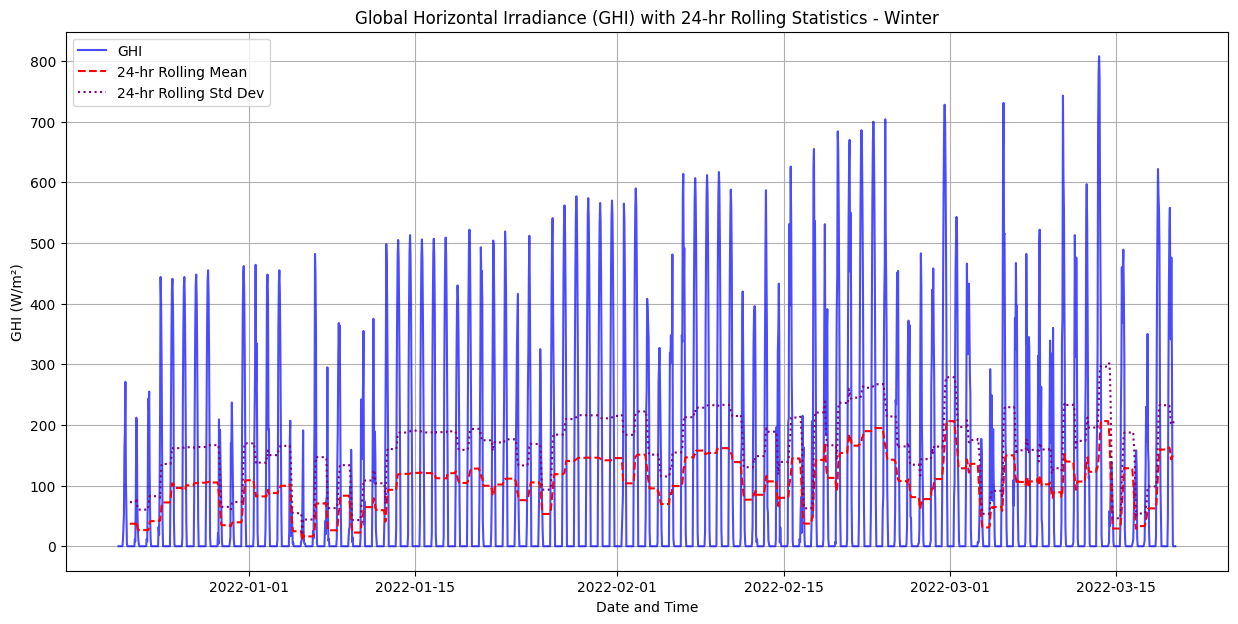

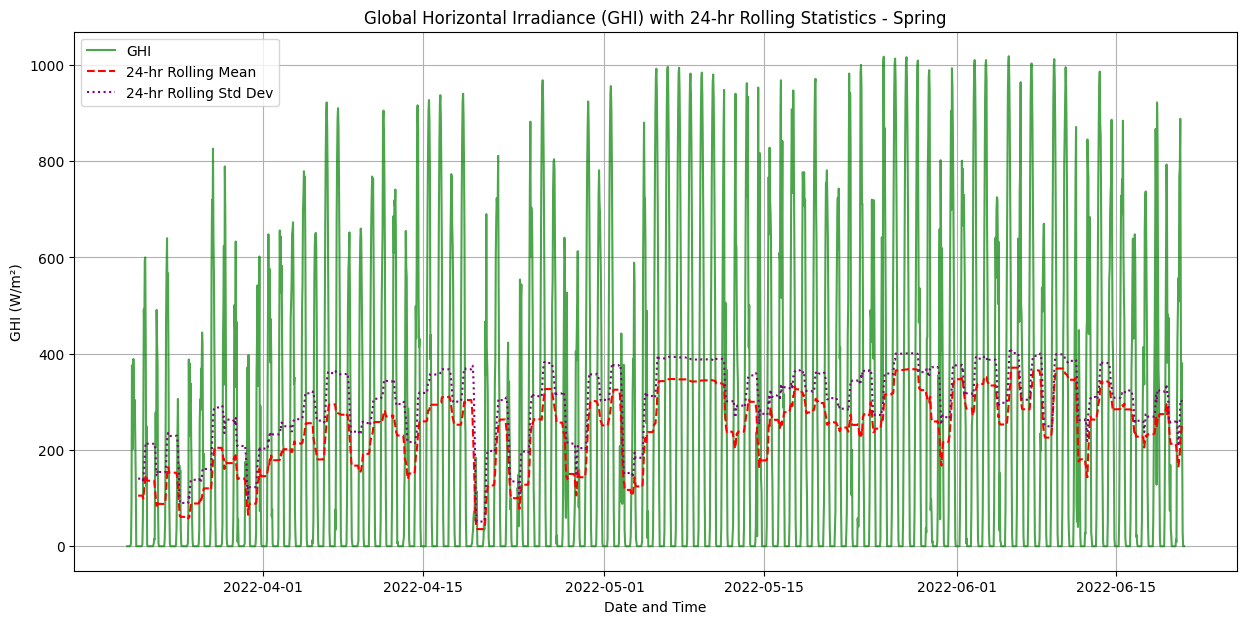

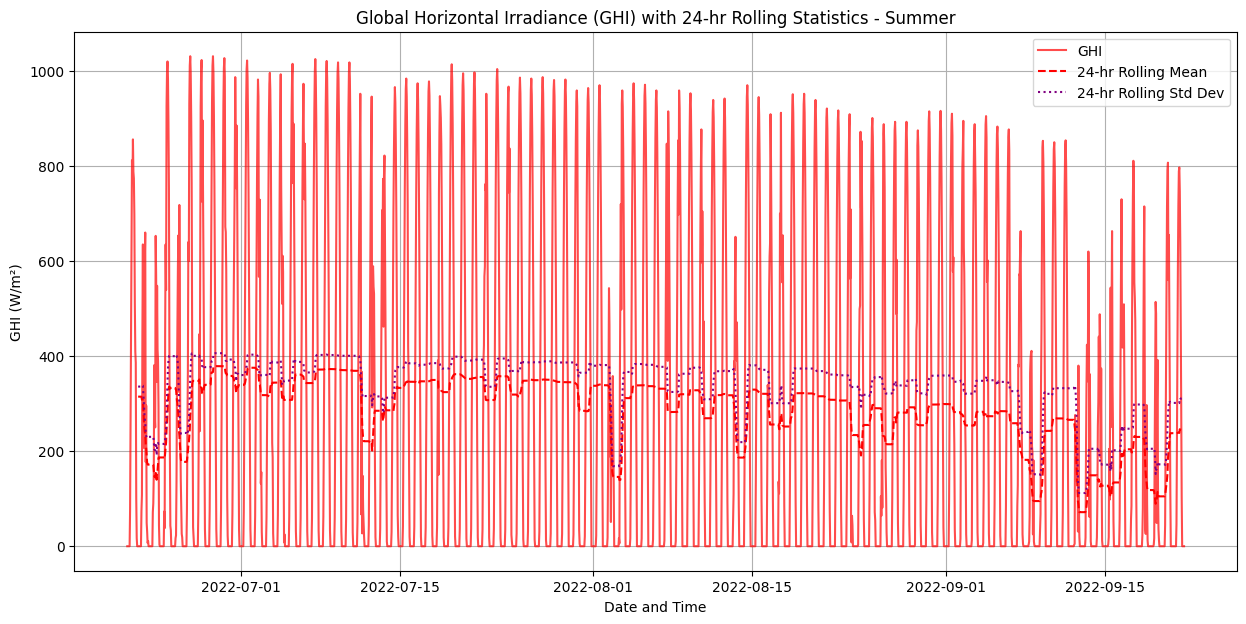

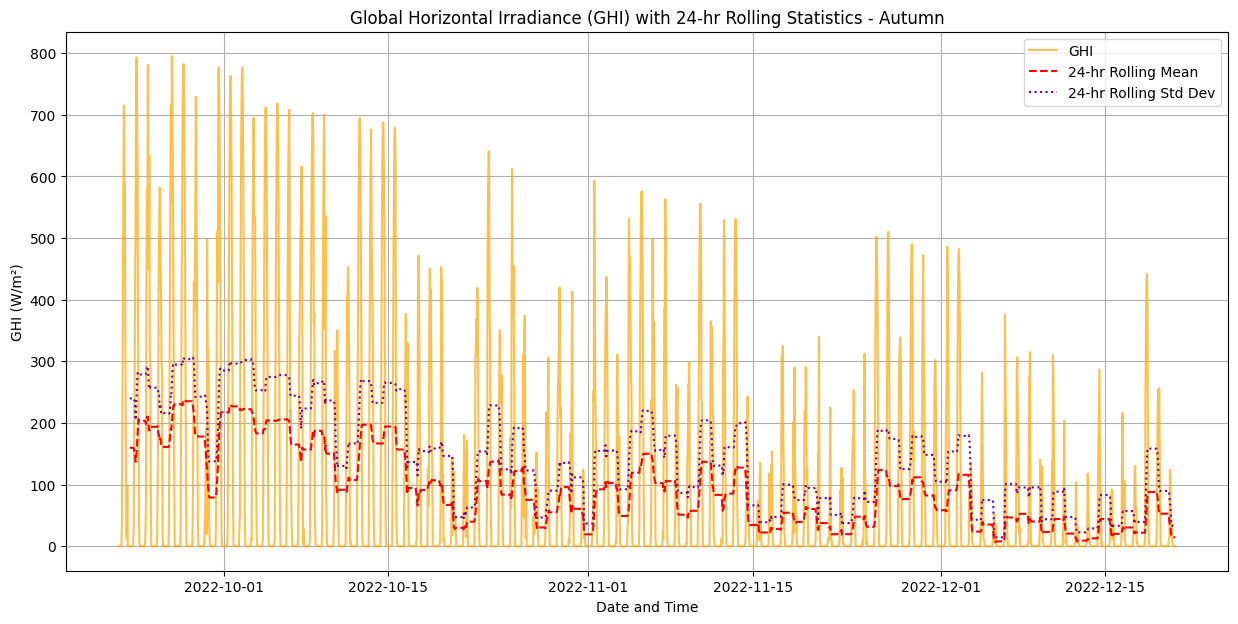

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot GHI with rolling statistics for a given season
def plot_ghi_rolling_stats(df, season_name, color):
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df, x=df.index, y='GHI', label='GHI', color=color, alpha=0.7)
    sns.lineplot(data=df, x=df.index, y='GHI_rolling_mean', label='24-hr Rolling Mean', color='red', linestyle='--')
    sns.lineplot(data=df, x=df.index, y='GHI_rolling_std', label='24-hr Rolling Std Dev', color='purple', linestyle=':')
    plt.title(f'Global Horizontal Irradiance (GHI) with 24-hr Rolling Statistics - {season_name}')
    plt.xlabel('Date and Time')
    plt.ylabel('GHI (W/m²)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot for Winter
plot_ghi_rolling_stats(dfp_full_winter_period, 'Winter', 'blue')

# Plot for Spring
plot_ghi_rolling_stats(dfp_spring_astro, 'Spring', 'green')

# Plot for Summer
plot_ghi_rolling_stats(dfp_summer_astro, 'Summer', 'red')

# Plot for Autumn
plot_ghi_rolling_stats(dfp_autumn_astro, 'Autumn', 'orange')

### Review and Interpretation of Seasonal Rolling Statistics

#### Winter:
*   **GHI and Rolling Mean:** In winter, the GHI values are generally low, with many periods of zero irradiance during night hours. The 24-hour rolling mean reflects this, staying at lower levels compared to other seasons. The mean GHI starts low at the beginning of winter, gradually increases towards the end of winter (as spring approaches).
*   **Rolling Standard Deviation:** The rolling standard deviation is also relatively low, indicating less variability in GHI, especially during the darker, shorter days and longer nights.

#### Spring:
*   **GHI and Rolling Mean:** Spring shows a noticeable increase in GHI values. The 24-hour rolling mean steadily rises, indicating longer daylight hours and higher solar intensity. The daily peaks of GHI become significantly higher than in winter.
*   **Rolling Standard Deviation:** The rolling standard deviation increases significantly from winter, reflecting greater daily fluctuations between high daytime GHI and zero nighttime GHI. This suggests higher volatility as solar radiation becomes more intense and days lengthen.

#### Summer:
*   **GHI and Rolling Mean:** Summer exhibits the highest GHI values and the highest 24-hour rolling mean. This is expected due to the longest daylight hours and maximum solar intensity. The GHI peaks are consistently high.
*   **Rolling Standard Deviation:** The rolling standard deviation is at its highest in summer, further emphasizing the large difference between peak daytime GHI and nighttime zero values, and potentially more dynamic weather patterns affecting solar radiation. The variability is pronounced due to the strong solar cycles.

#### Autumn:
*   **GHI and Rolling Mean:** In autumn, GHI values and the 24-hour rolling mean begin to decrease, mirroring the approach of winter. Daylight hours shorten, and solar intensity diminishes. The mean GHI starts high at the beginning of autumn (after summer) and gradually decreases.
*   **Rolling Standard Deviation:** The rolling standard deviation also shows a decreasing trend from its summer peak, reflecting a reduction in the magnitude of daily GHI fluctuations as days become shorter and solar intensity wanes.

#### Overall Observations:
*   **Seasonal Trend:** There is a clear and strong seasonal trend in GHI, with a cyclical pattern peaking in summer and bottoming out in winter. The rolling mean effectively captures this overall trend, smoothing out daily variations.
*   **Variability:** The volatility of GHI, as indicated by the rolling standard deviation, is directly correlated with the magnitude of GHI. Seasons with higher GHI (spring, summer) show greater variability, while seasons with lower GHI (winter, autumn) show less variability. This is primarily driven by the strong diurnal cycle and the presence of significant daytime GHI values versus zero nighttime values, which become more pronounced with longer and brighter days.


Apply Min-Max normalization and Z-score standardization to the 'GHI' and 'Temperature' columns within the `dfp_full_winter_period`, `dfp_spring_astro`, `dfp_summer_astro`, and `dfp_autumn_astro` DataFrames, creating new columns for the transformed values, and then display the head and descriptive statistics for these new columns for each DataFrame.

In [171]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to 'GHI' and 'Temperature'
dfp_full_winter_period[['GHI_minmax', 'Temperature_minmax']] = min_max_scaler.fit_transform(dfp_full_winter_period[['GHI', 'Temperature']])

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Apply Z-score standardization to 'GHI' and 'Temperature'
dfp_full_winter_period[['GHI_zscore', 'Temperature_zscore']] = standard_scaler.fit_transform(dfp_full_winter_period[['GHI', 'Temperature']])

print("DataFrame head with new normalized/standardized columns for Winter data:")
print(dfp_full_winter_period.head())

print("\nDescriptive statistics for normalized and standardized GHI and Temperature in Winter data:")
print(dfp_full_winter_period[['GHI_minmax', 'Temperature_minmax', 'GHI_zscore', 'Temperature_zscore']].describe())

DataFrame head with new normalized/standardized columns for Winter data:
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2021-12-21 00:30:00          6.8             0             0             0   
2021-12-21 01:30:00          6.8             0             0             0   
2021-12-21 02:30:00          6.8             0             0             0   
2021-12-21 03:30:00          6.9             0             0             0   
2021-12-21 04:30:00          7.0             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2021-12-21 00:30:00           0              99.88       914             234   
2021-12-21 01:30:00           8              98.73       914             232   
2021-12-21 02:30:00           7              97.97       914

In [172]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to 'GHI' and 'Temperature'
dfp_spring_astro[['GHI_minmax', 'Temperature_minmax']] = min_max_scaler.fit_transform(dfp_spring_astro[['GHI', 'Temperature']])

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Apply Z-score standardization to 'GHI' and 'Temperature'
dfp_spring_astro[['GHI_zscore', 'Temperature_zscore']] = standard_scaler.fit_transform(dfp_spring_astro[['GHI', 'Temperature']])

print("DataFrame head with new normalized/standardized columns for Spring data:")
print(dfp_spring_astro.head())

print("\nDescriptive statistics for normalized and standardized GHI and Temperature in Spring data:")
print(dfp_spring_astro[['GHI_minmax', 'Temperature_minmax', 'GHI_zscore', 'Temperature_zscore']].describe())

DataFrame head with new normalized/standardized columns for Spring data:
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2022-03-20 00:30:00          5.0             0             0             0   
2022-03-20 01:30:00          4.8             0             0             0   
2022-03-20 02:30:00          4.6             0             0             0   
2022-03-20 03:30:00          4.4             0             0             0   
2022-03-20 04:30:00          4.1             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2022-03-20 00:30:00           4              93.11       913             152   
2022-03-20 01:30:00           1              95.87       912             150   
2022-03-20 02:30:00           1              98.22       912

In [173]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to 'GHI' and 'Temperature'
dfp_summer_astro[['GHI_minmax', 'Temperature_minmax']] = min_max_scaler.fit_transform(dfp_summer_astro[['GHI', 'Temperature']])

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Apply Z-score standardization to 'GHI' and 'Temperature'
dfp_summer_astro[['GHI_zscore', 'Temperature_zscore']] = standard_scaler.fit_transform(dfp_summer_astro[['GHI', 'Temperature']])

print("DataFrame head with new normalized/standardized columns for Summer data:")
print(dfp_summer_astro.head())

print("\nDescriptive statistics for normalized and standardized GHI and Temperature in Summer data:")
print(dfp_summer_astro[['GHI_minmax', 'Temperature_minmax', 'GHI_zscore', 'Temperature_zscore']].describe())

DataFrame head with new normalized/standardized columns for Summer data:
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2022-06-21 00:30:00         12.3             0             0             0   
2022-06-21 01:30:00         11.7             0             0             0   
2022-06-21 02:30:00         11.1             0             0             0   
2022-06-21 03:30:00         10.6             0             0             0   
2022-06-21 04:30:00         10.2             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2022-06-21 00:30:00           0              69.96       906             315   
2022-06-21 01:30:00           3              73.81       906             310   
2022-06-21 02:30:00           7              76.46       906

In [174]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize Min-Max Scaler
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to 'GHI' and 'Temperature'
dfp_autumn_astro[['GHI_minmax', 'Temperature_minmax']] = min_max_scaler.fit_transform(dfp_autumn_astro[['GHI', 'Temperature']])

# Initialize Standard Scaler
standard_scaler = StandardScaler()

# Apply Z-score standardization to 'GHI' and 'Temperature'
dfp_autumn_astro[['GHI_zscore', 'Temperature_zscore']] = standard_scaler.fit_transform(dfp_autumn_astro[['GHI', 'Temperature']])

print("DataFrame head with new normalized/standardized columns for Autumn data:")
print(dfp_autumn_astro.head())

print("\nDescriptive statistics for normalized and standardized GHI and Temperature in Autumn data:")
print(dfp_autumn_astro[['GHI_minmax', 'Temperature_minmax', 'GHI_zscore', 'Temperature_zscore']].describe())

DataFrame head with new normalized/standardized columns for Autumn data:
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2022-09-22 00:30:00         15.8             0             0             0   
2022-09-22 01:30:00         15.2             0             0             0   
2022-09-22 02:30:00         14.6             0             0             0   
2022-09-22 03:30:00         14.1             0             0             0   
2022-09-22 04:30:00         13.7             0             0             0   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2022-09-22 00:30:00           0              63.54       911              59   
2022-09-22 01:30:00           0              65.12       911              77   
2022-09-22 02:30:00           0              66.62       911

implement xgboost




*   The normalized and standardized 'GHI' and 'Temperature' data are now suitable for use in machine learning models that are sensitive to feature scales, ensuring fair contribution from each feature.
*   The transformed datasets can be used for direct comparison of GHI and Temperature patterns across different seasons, as their scales are now consistent, allowing for more accurate seasonal trend analysis.



For each seasonal DataFrame, filter to include only daytime records where Global Horizontal Irradiance (GHI) is greater than 0, then ensure the continuity of the GHI time series by interpolating any remaining missing values, preparing the data for time series modeling.

In [175]:
import numpy as np

# 1. Filter each seasonal DataFrame for daytime records (GHI > 0)
# Winter
dfp_winter_daytime = dfp_full_winter_period[dfp_full_winter_period['GHI'] > 0].copy()
# Spring
dfp_spring_daytime = dfp_spring_astro[dfp_spring_astro['GHI'] > 0].copy()
# Summer
dfp_summer_daytime = dfp_summer_astro[dfp_summer_astro['GHI'] > 0].copy()
# Autumn
dfp_autumn_daytime = dfp_autumn_astro[dfp_autumn_astro['GHI'] > 0].copy()


# 2. Apply time-based interpolation to the 'GHI' column for each filtered DataFrame
# Winter
dfp_winter_daytime['GHI'] = dfp_winter_daytime['GHI'].interpolate(method='time')
# Spring
dfp_spring_daytime['GHI'] = dfp_spring_daytime['GHI'].interpolate(method='time')
# Summer
dfp_summer_daytime['GHI'] = dfp_summer_daytime['GHI'].interpolate(method='time')
# Autumn
dfp_autumn_daytime['GHI'] = dfp_autumn_daytime['GHI'].interpolate(method='time')


# 3. Display the head and check NaN counts for 'GHI' in each processed DataFrame

print("### Processed Winter Daytime Data (dfp_winter_daytime) ###")
print(dfp_winter_daytime.head())
print(f"NaN count in 'GHI' column: {dfp_winter_daytime['GHI'].isnull().sum()}\n")

print("### Processed Spring Daytime Data (dfp_spring_daytime) ###")
print(dfp_spring_daytime.head())
print(f"NaN count in 'GHI' column: {dfp_spring_daytime['GHI'].isnull().sum()}\n")

print("### Processed Summer Daytime Data (dfp_summer_daytime) ###")
print(dfp_summer_daytime.head())
print(f"NaN count in 'GHI' column: {dfp_summer_daytime['GHI'].isnull().sum()}\n")

print("### Processed Autumn Daytime Data (dfp_autumn_daytime) ###")
print(dfp_autumn_daytime.head())
print(f"NaN count in 'GHI' column: {dfp_autumn_daytime['GHI'].isnull().sum()}\n")

### Processed Winter Daytime Data (dfp_winter_daytime) ###
                     Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
DateTime                                                                     
2021-12-21 09:30:00          8.2            31           532            96   
2021-12-21 10:30:00          9.4            46           742           238   
2021-12-21 11:30:00         10.4            53           836           354   
2021-12-21 12:30:00         11.2            57           875           424   
2021-12-21 13:30:00         11.8            65           860           436   

                     Cloud Type  Relative Humidity  Pressure  Wind Direction  \
DateTime                                                                       
2021-12-21 09:30:00           3              92.95       915             238   
2021-12-21 10:30:00           3              89.88       916             243   
2021-12-21 11:30:00           3              84.85       916             2

In [176]:
def split_data(df, train_ratio=0.8):
    split_index = int(len(df) * train_ratio)
    train_df = df.iloc[:split_index]
    test_df = df.iloc[split_index:]
    return train_df, test_df

# Split Winter data
dfp_winter_train, dfp_winter_test = split_data(dfp_winter_daytime)
print("Winter Train Shape:", dfp_winter_train.shape)
print("Winter Test Shape:", dfp_winter_test.shape)

# Split Spring data
dfp_spring_train, dfp_spring_test = split_data(dfp_spring_daytime)
print("Spring Train Shape:", dfp_spring_train.shape)
print("Spring Test Shape:", dfp_spring_test.shape)

# Split Summer data
dfp_summer_train, dfp_summer_test = split_data(dfp_summer_daytime)
print("Summer Train Shape:", dfp_summer_train.shape)
print("Summer Test Shape:", dfp_summer_test.shape)

# Split Autumn data
dfp_autumn_train, dfp_autumn_test = split_data(dfp_autumn_daytime)
print("Autumn Train Shape:", dfp_autumn_train.shape)
print("Autumn Test Shape:", dfp_autumn_test.shape)

Winter Train Shape: (708, 28)
Winter Test Shape: (177, 28)
Spring Train Shape: (1024, 28)
Spring Test Shape: (257, 28)
Summer Train Shape: (1025, 28)
Summer Test Shape: (257, 28)
Autumn Train Shape: (734, 28)
Autumn Test Shape: (184, 28)


In [177]:
from statsmodels.tsa.stattools import adfuller

def run_adf_test(series, name):
    print(f"\n--- ADF Test for {name} ---")
    series_clean = series.dropna()
    if series_clean.empty:
        print("Series is empty after dropping NaNs, cannot perform ADF test.")
        return

    result = adfuller(series_clean)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05: # p-value <= 0.05 indicates stationarity
        print("Result: The series is likely stationary (reject H0)")
    else:
        print("Result: The series is likely non-stationary (fail to reject H0)")

In [178]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, title, lags=50):
    series_clean = series.dropna()
    if series_clean.empty:
        print(f"Series '{title}' is empty after dropping NaNs, cannot plot ACF/PACF.")
        return

    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plot_acf(series_clean, lags=lags, ax=plt.gca())
    plt.title(f'ACF of {title}')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.grid(True)

    plt.subplot(122)
    plot_pacf(series_clean, lags=lags, ax=plt.gca())
    plt.title(f'PACF of {title}')
    plt.xlabel('Lags')
    plt.ylabel('Partial Autocorrelation')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


--- Winter Daytime Data Analysis ---

--- ADF Test for Winter GHI - Original ---
ADF Statistic: -4.033485
p-value: 0.001245
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Result: The series is likely stationary (reject H0)

--- ADF Test for Winter GHI - First Difference ---
ADF Statistic: -11.345024
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Result: The series is likely stationary (reject H0)


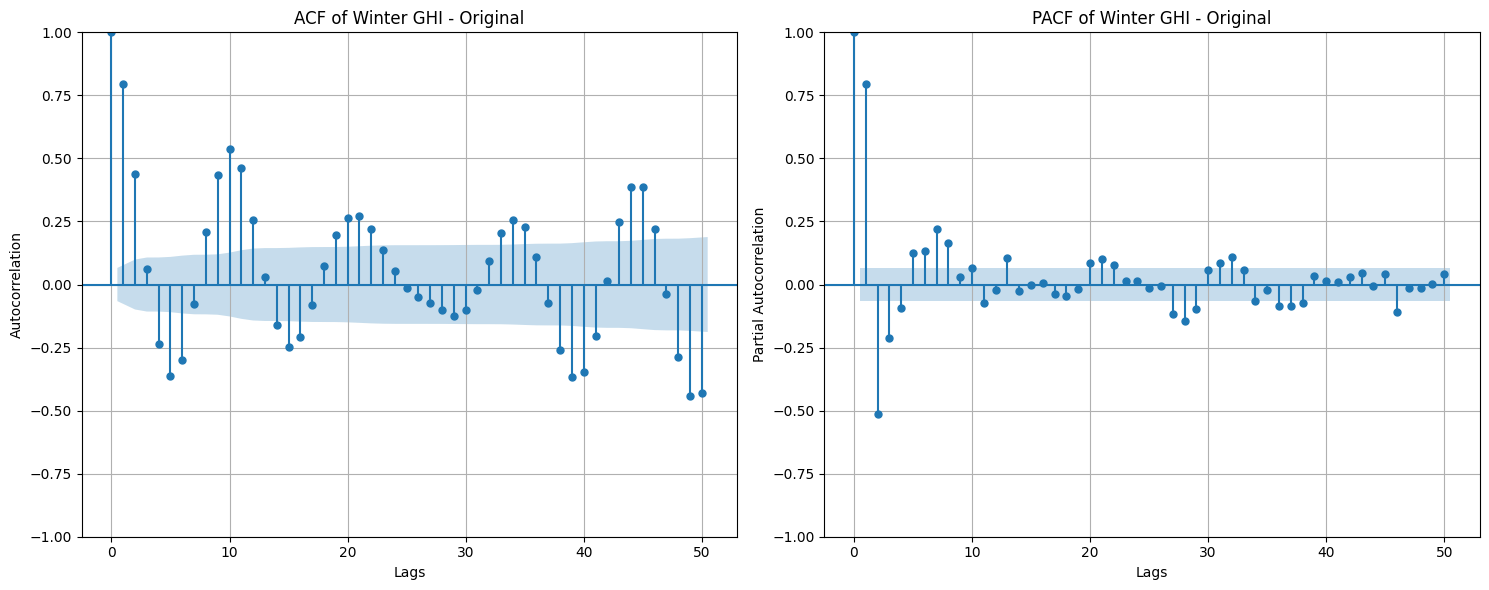

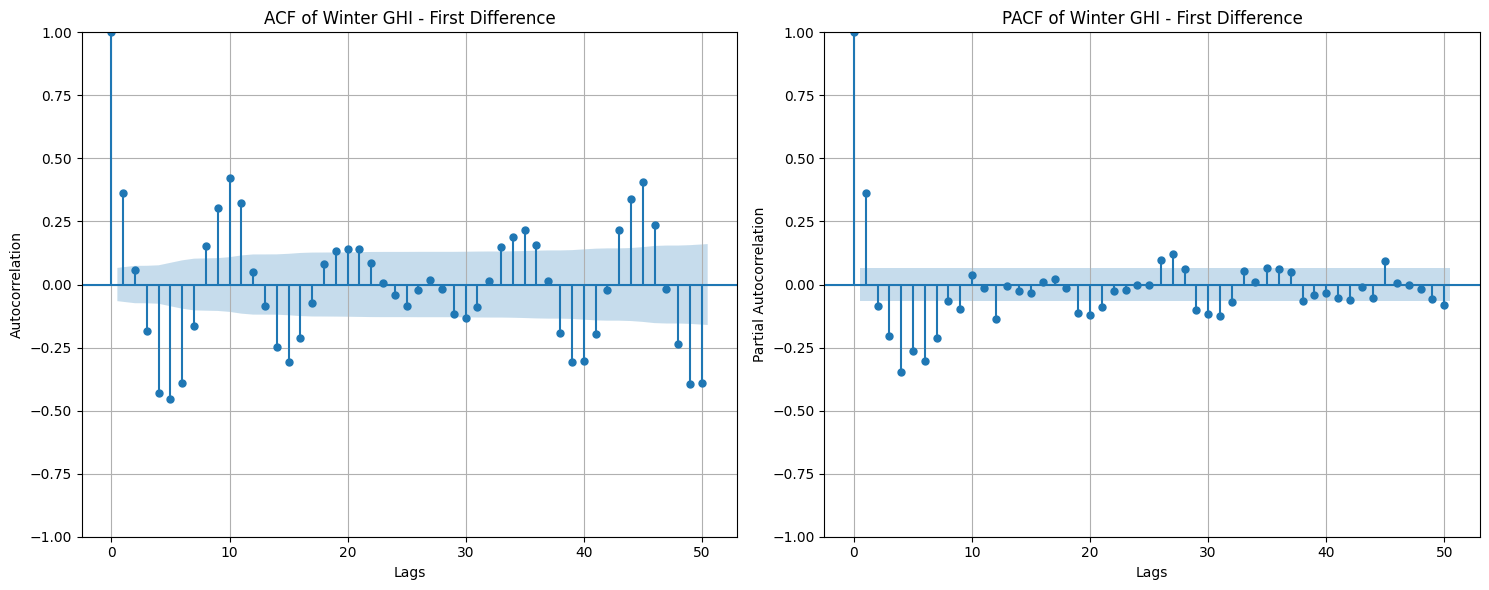

In [179]:
print("\n--- Winter Daytime Data Analysis ---")

# a. Apply ADF test to original 'GHI' column for winter
run_adf_test(dfp_winter_daytime['GHI'], 'Winter GHI - Original')

# b. Calculate the first-order difference of the 'GHI' column
winter_ghi_diff1 = dfp_winter_daytime['GHI'].diff(1)

# c. Apply ADF test to the first-differenced 'GHI' series for winter
run_adf_test(winter_ghi_diff1, 'Winter GHI - First Difference')

# d. Apply ACF/PACF plots to the original 'GHI' column for winter
plot_acf_pacf(dfp_winter_daytime['GHI'], 'Winter GHI - Original')

# e. Apply ACF/PACF plots to the first-differenced 'GHI' series for winter
plot_acf_pacf(winter_ghi_diff1, 'Winter GHI - First Difference')

**Reasoning**:
I will repeat the analysis of ADF tests and ACF/PACF plots for the `dfp_spring_daytime` DataFrame, similar to the steps performed for the winter season, to determine stationarity and identify potential SARIMA orders for spring.




--- Spring Daytime Data Analysis ---

--- ADF Test for Spring GHI - Original ---
ADF Statistic: -5.621393
p-value: 0.000001
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Result: The series is likely stationary (reject H0)

--- ADF Test for Spring GHI - First Difference ---
ADF Statistic: -16.047178
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Result: The series is likely stationary (reject H0)


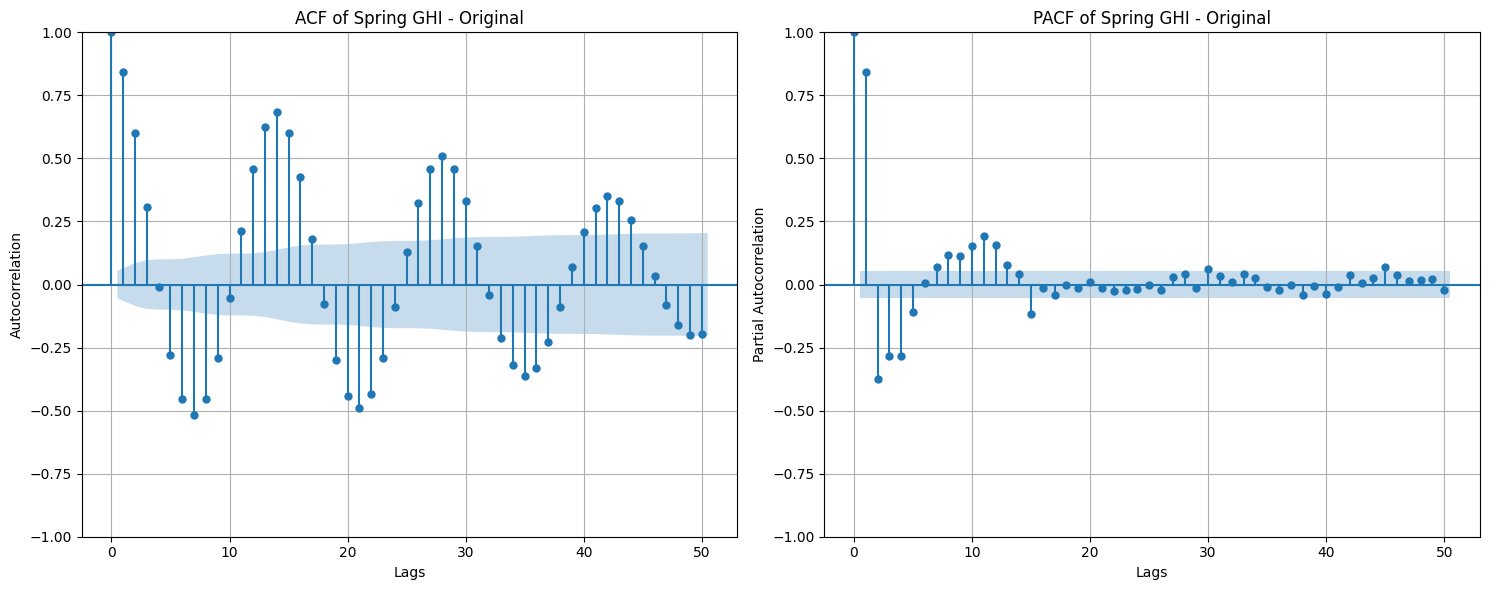

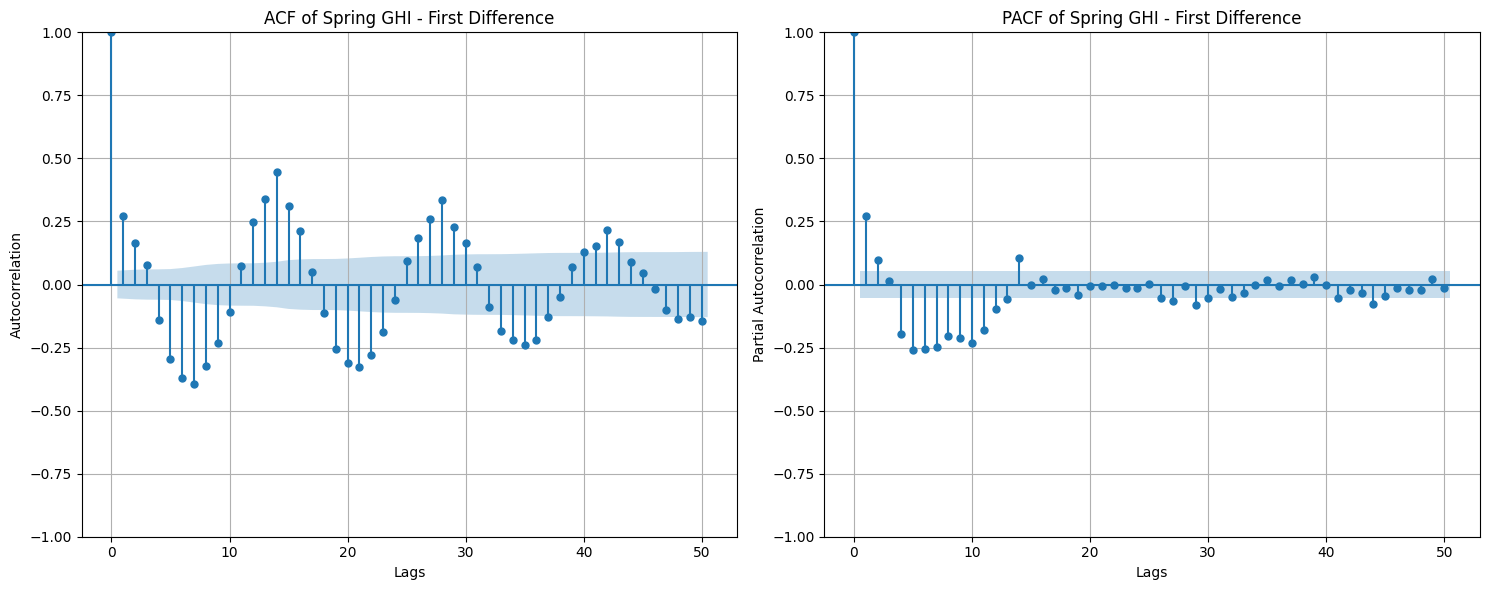

In [180]:
print("\n--- Spring Daytime Data Analysis ---")

# a. Apply ADF test to original 'GHI' column for spring
run_adf_test(dfp_spring_daytime['GHI'], 'Spring GHI - Original')

# b. Calculate the first-order difference of the 'GHI' column
spring_ghi_diff1 = dfp_spring_daytime['GHI'].diff(1)

# c. Apply ADF test to the first-differenced 'GHI' series for spring
run_adf_test(spring_ghi_diff1, 'Spring GHI - First Difference')

# d. Apply ACF/PACF plots to the original 'GHI' column for spring
plot_acf_pacf(dfp_spring_daytime['GHI'], 'Spring GHI - Original')

# e. Apply ACF/PACF plots to the first-differenced 'GHI' series for spring
plot_acf_pacf(spring_ghi_diff1, 'Spring GHI - First Difference')


--- Summer Daytime Data Analysis ---

--- ADF Test for Summer GHI - Original ---
ADF Statistic: -5.858991
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Result: The series is likely stationary (reject H0)

--- ADF Test for Summer GHI - First Difference ---
ADF Statistic: -8.912546
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Result: The series is likely stationary (reject H0)


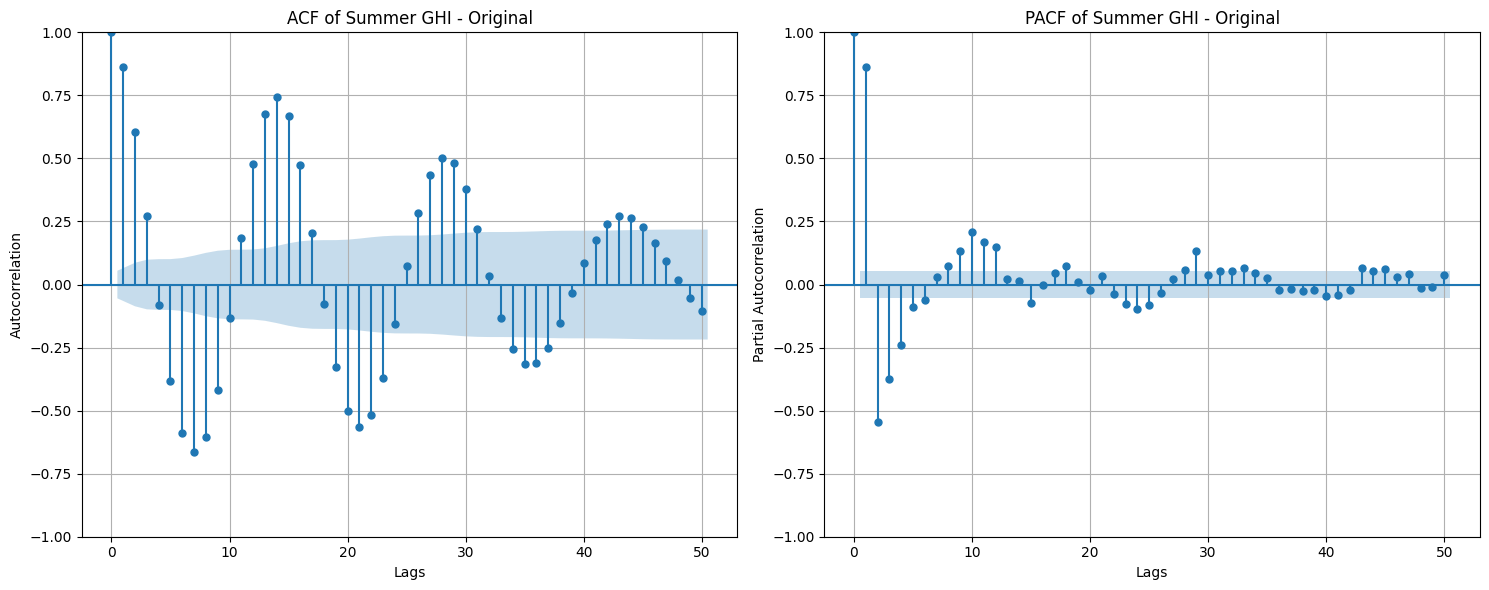

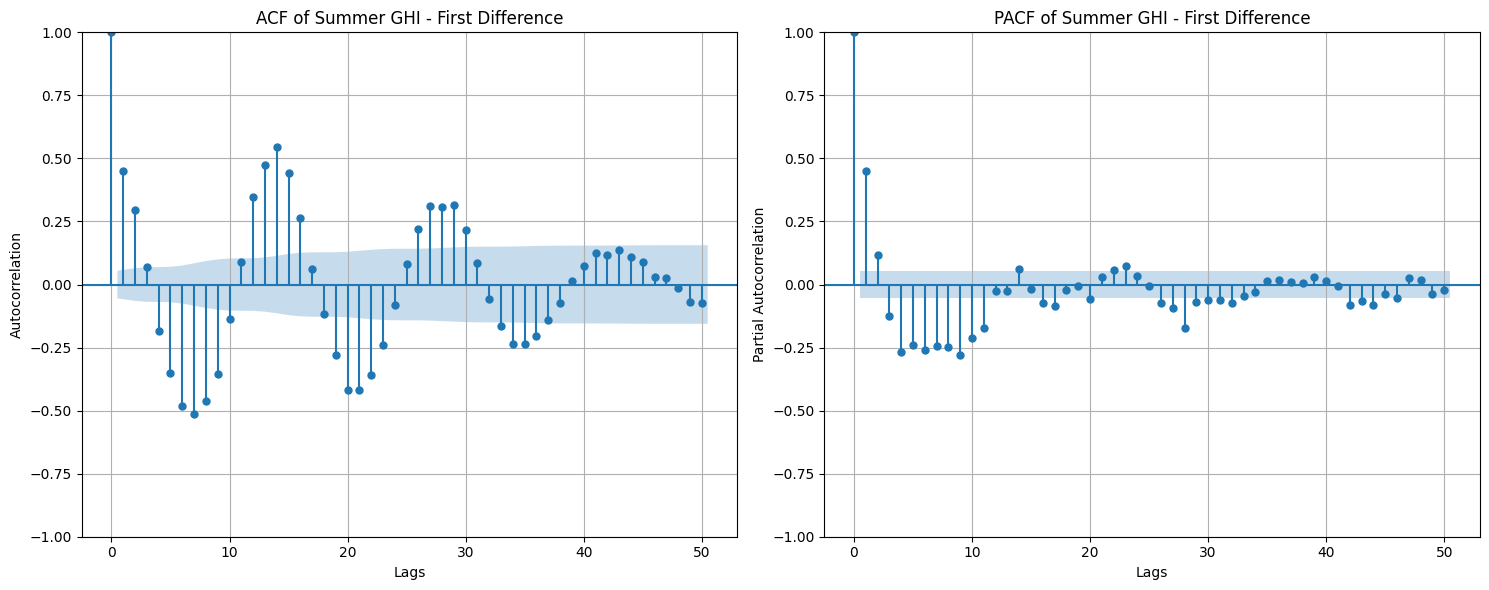

In [181]:
print("\n--- Summer Daytime Data Analysis ---")

# a. Apply ADF test to original 'GHI' column for summer
run_adf_test(dfp_summer_daytime['GHI'], 'Summer GHI - Original')

# b. Calculate the first-order difference of the 'GHI' column
summer_ghi_diff1 = dfp_summer_daytime['GHI'].diff(1)

# c. Apply ADF test to the first-differenced 'GHI' series for summer
run_adf_test(summer_ghi_diff1, 'Summer GHI - First Difference')

# d. Apply ACF/PACF plots to the original 'GHI' column for summer
plot_acf_pacf(dfp_summer_daytime['GHI'], 'Summer GHI - Original')

# e. Apply ACF/PACF plots to the first-differenced 'GHI' series for summer
plot_acf_pacf(summer_ghi_diff1, 'Summer GHI - First Difference')


--- Autumn Daytime Data Analysis ---

--- ADF Test for Autumn GHI - Original ---
ADF Statistic: -3.259724
p-value: 0.016778
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.568
Result: The series is likely stationary (reject H0)

--- ADF Test for Autumn GHI - First Difference ---
ADF Statistic: -9.476161
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.568
Result: The series is likely stationary (reject H0)


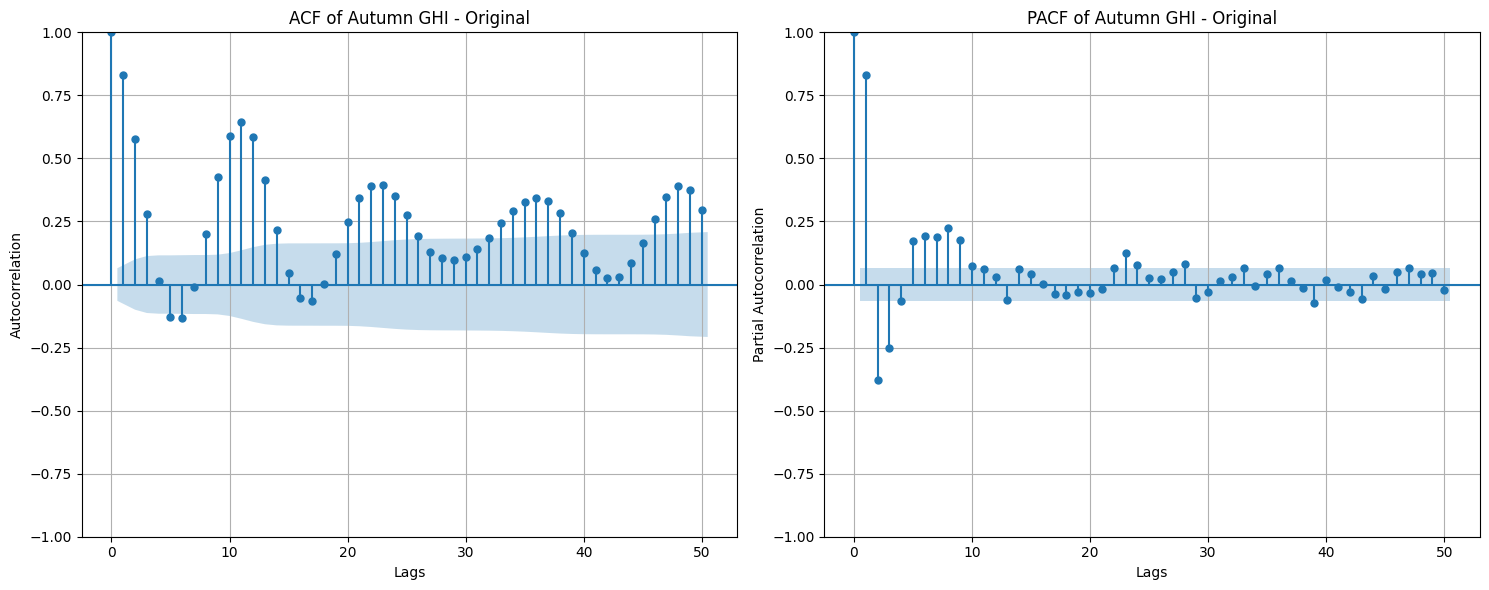

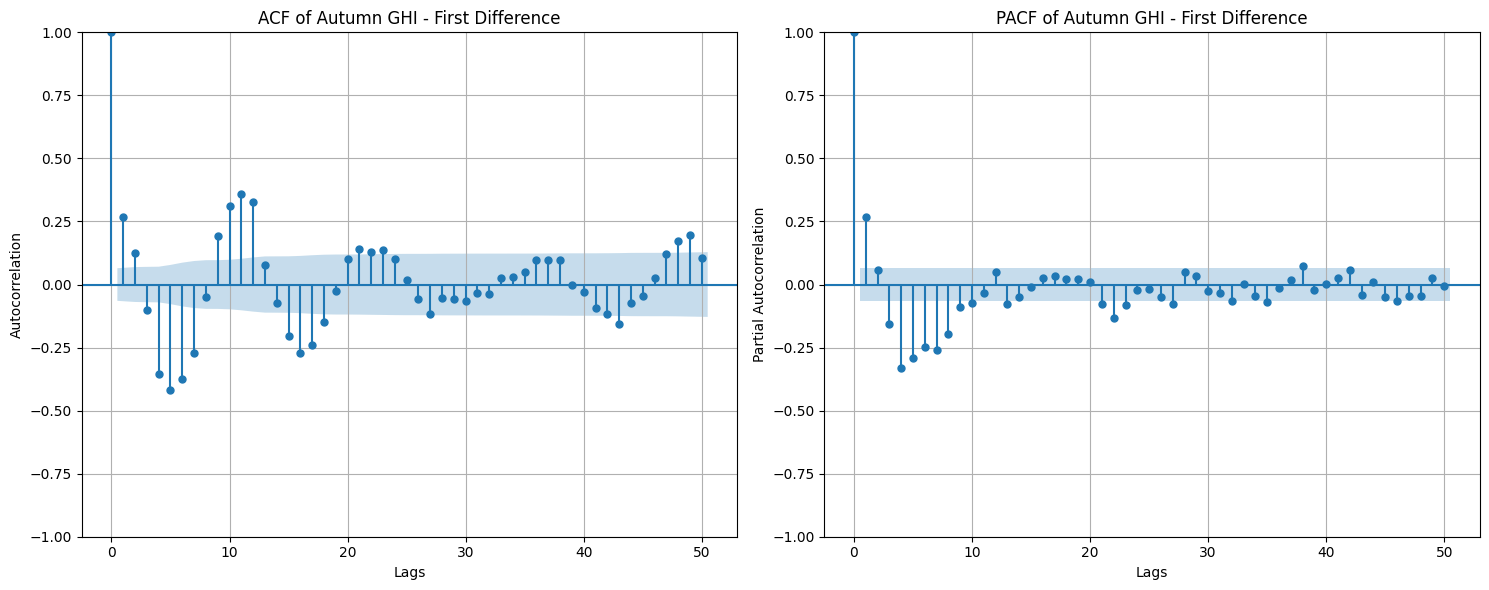

In [182]:
print("\n--- Autumn Daytime Data Analysis ---")

# a. Apply ADF test to original 'GHI' column for autumn
run_adf_test(dfp_autumn_daytime['GHI'], 'Autumn GHI - Original')

# b. Calculate the first-order difference of the 'GHI' column
autumn_ghi_diff1 = dfp_autumn_daytime['GHI'].diff(1)

# c. Apply ADF test to the first-differenced 'GHI' series for autumn
run_adf_test(autumn_ghi_diff1, 'Autumn GHI - First Difference')

# d. Apply ACF/PACF plots to the original 'GHI' column for autumn
plot_acf_pacf(dfp_autumn_daytime['GHI'], 'Autumn GHI - Original')

# e. Apply ACF/PACF plots to the first-differenced 'GHI' series for autumn
plot_acf_pacf(autumn_ghi_diff1, 'Autumn GHI - First Difference')

In [199]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Define the seasonal period for hourly data
seasonal_period = 24

# Dictionary to store results for each season
seasonal_results = {}

seasons = {
    'Winter': {'train': dfp_winter_train, 'test': dfp_winter_test},
    'Spring': {'train': dfp_spring_train, 'test': dfp_spring_test},
    'Summer': {'train': dfp_summer_train, 'test': dfp_summer_test},
    'Autumn': {'train': dfp_autumn_train, 'test': dfp_autumn_test}
}

for season_name, data in seasons.items():
    print(f"\n--- Training and Evaluating SARIMA for {season_name} ---")
    train_data = data['train']['GHI'].dropna()
    test_data = data['test']['GHI'].dropna()

    if train_data.empty or test_data.empty:
        print(f"Skipping {season_name}: Insufficient data after dropping NaNs.")
        continue

    try:
        # SARIMAX expects a DatetimeIndex. Ensure it's treated as such.
        if not isinstance(train_data.index, pd.DatetimeIndex):
            train_data.index = pd.to_datetime(train_data.index)
        if not isinstance(test_data.index, pd.DatetimeIndex):
            test_data.index = pd.to_datetime(test_data.index)

        model = SARIMAX(train_data, order=(2, 0, 2), seasonal_order=(1, 1, 1, seasonal_period),
                        enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # Make predictions on the test set using integer positions relative to the training data
        start_prediction_index = len(train_data)
        end_prediction_index = len(train_data) + len(test_data) - 1
        predictions = model_fit.predict(start=start_prediction_index, end=end_prediction_index, dynamic=False)

        # Assign the datetime index from the original test_data to the predictions for correct alignment
        if len(predictions) == len(test_data):
            predictions.index = test_data.index
        else:
            predictions = predictions.reindex(test_data.index)

        combined_df = pd.DataFrame({'actual': test_data, 'predicted': predictions}).dropna()
        actual_values = combined_df['actual']
        predicted_values = combined_df['predicted']

        if actual_values.empty or predicted_values.empty:
            print(f"Skipping {season_name}: No overlapping data for evaluation after prediction and alignment.")
            continue

        mae = mean_absolute_error(actual_values, predicted_values)
        rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

        # Calculate residuals
        residuals = actual_values - predicted_values

        print(f"{season_name} MAE: {mae:.2f}")
        print(f"{season_name} RMSE: {rmse:.2f}")

        seasonal_results[season_name] = {
            'MAE': mae,
            'RMSE': rmse,
            'actual_values': actual_values,
            'predicted_values': predicted_values,
            'residuals': residuals
        }

    except Exception as e:
        print(f"Error training/evaluating SARIMA for {season_name}: {e}")

print("\n--- Seasonal SARIMA Model Results ---")
for season_name, metrics in seasonal_results.items():
    print(f"{season_name}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}")


--- Training and Evaluating SARIMA for Winter ---


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/

Winter MAE: 169.56
Winter RMSE: 200.97

--- Training and Evaluating SARIMA for Spring ---


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Spring MAE: 244.46
Spring RMSE: 291.49

--- Training and Evaluating SARIMA for Summer ---


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Summer MAE: 254.74
Summer RMSE: 300.66

--- Training and Evaluating SARIMA for Autumn ---
Autumn MAE: 130.19
Autumn RMSE: 147.02

--- Seasonal SARIMA Model Results ---
Winter: MAE=169.56, RMSE=200.97
Spring: MAE=244.46, RMSE=291.49
Summer: MAE=254.74, RMSE=300.66
Autumn: MAE=130.19, RMSE=147.02


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


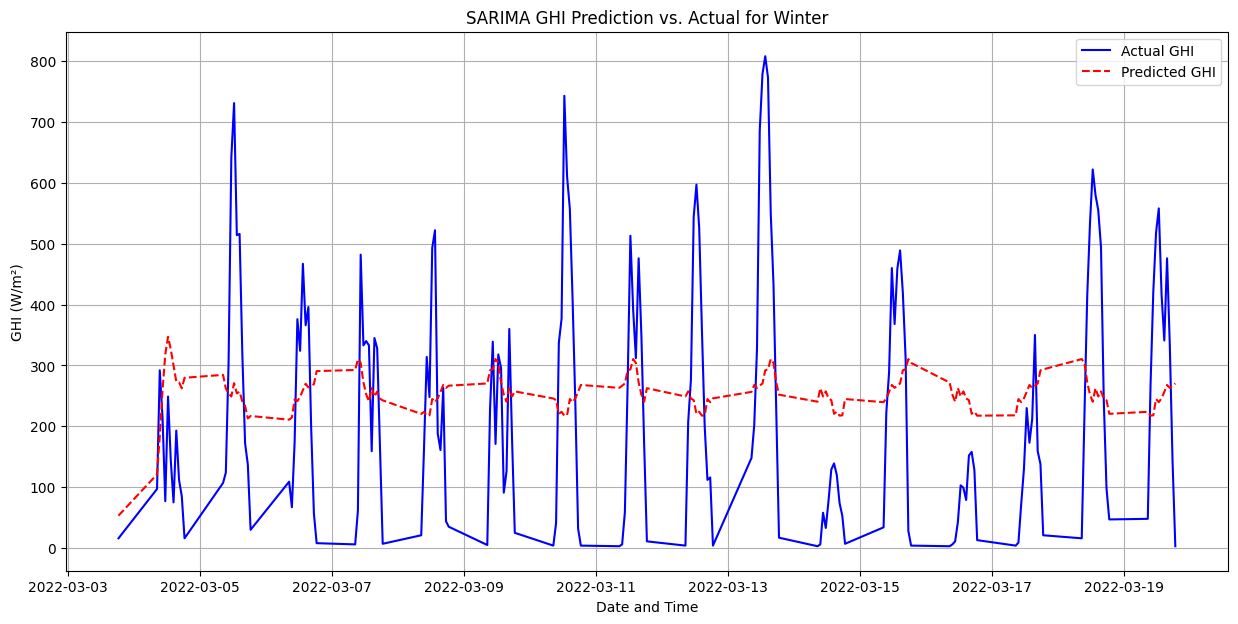

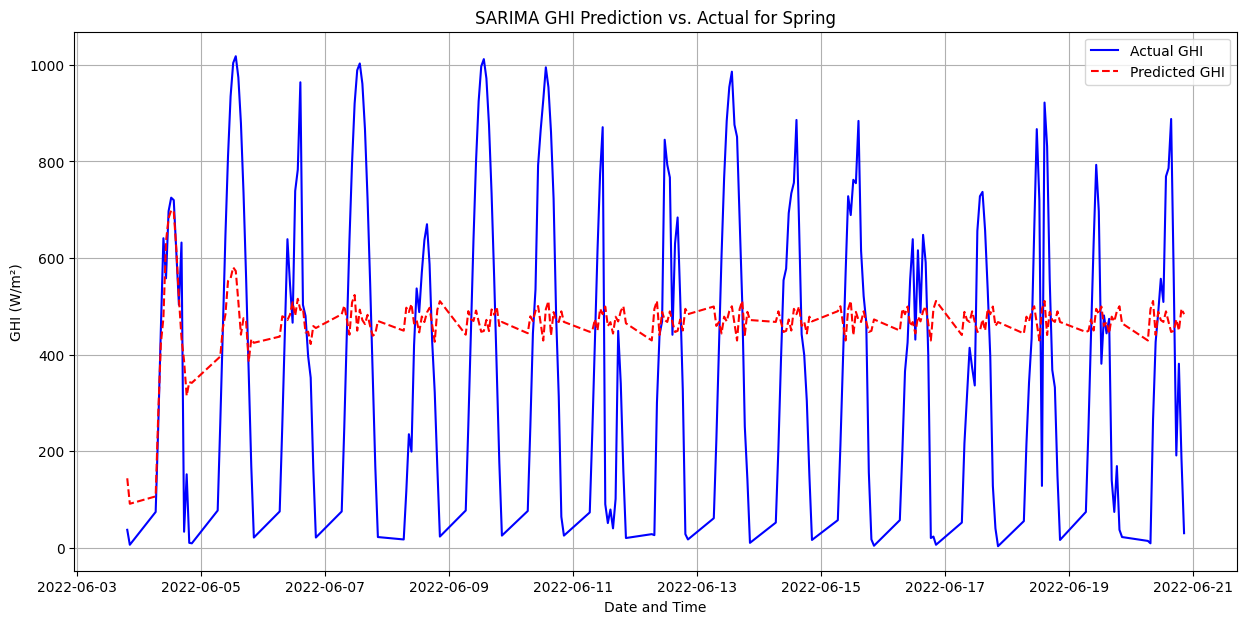

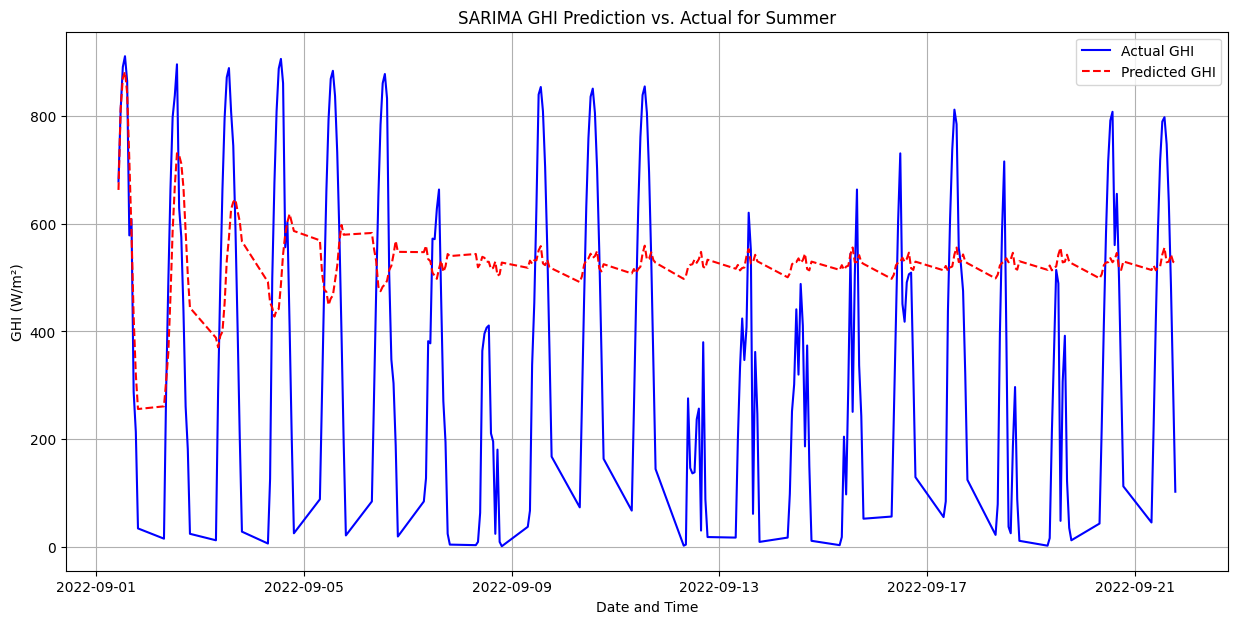

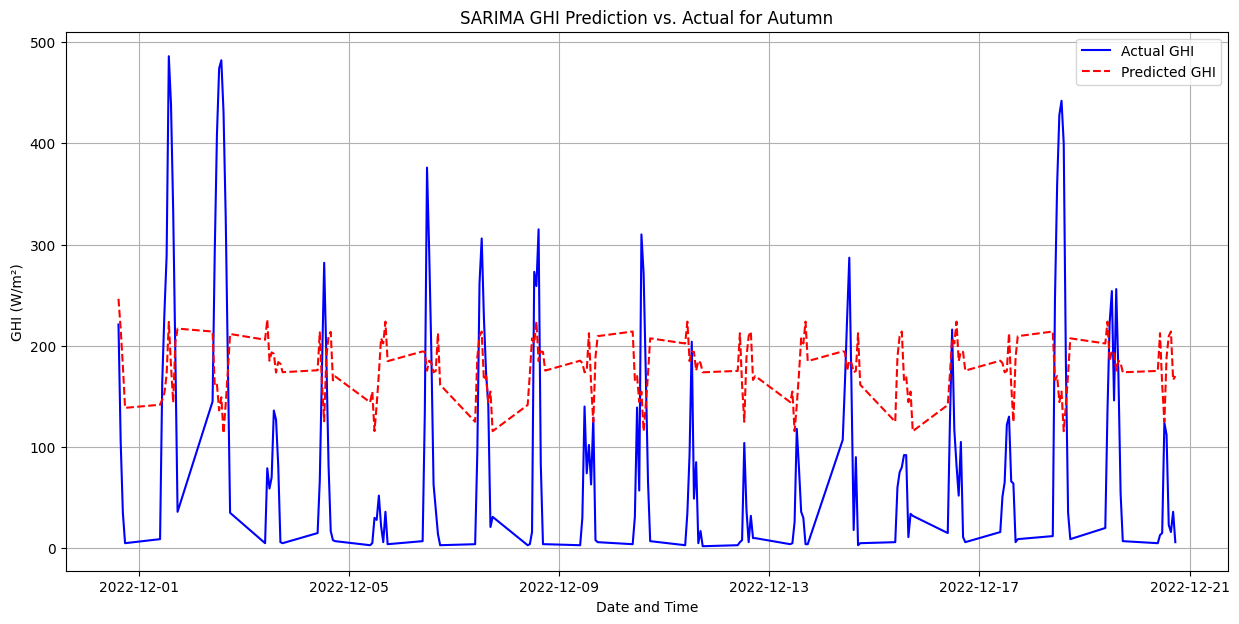

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs. predicted values for each season
for season_name, metrics in seasonal_results.items():
    plt.figure(figsize=(15, 7))
    plt.plot(metrics['actual_values'].index, metrics['actual_values'], label='Actual GHI', color='blue')
    plt.plot(metrics['predicted_values'].index, metrics['predicted_values'], label='Predicted GHI', color='red', linestyle='--')
    plt.title(f'SARIMA GHI Prediction vs. Actual for {season_name}')
    plt.xlabel('Date and Time')
    plt.ylabel('GHI (W/m²)')
    plt.legend()
    plt.grid(True)
    plt.show()


/tmp/ipython-input-1855019703.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, palette='viridis')


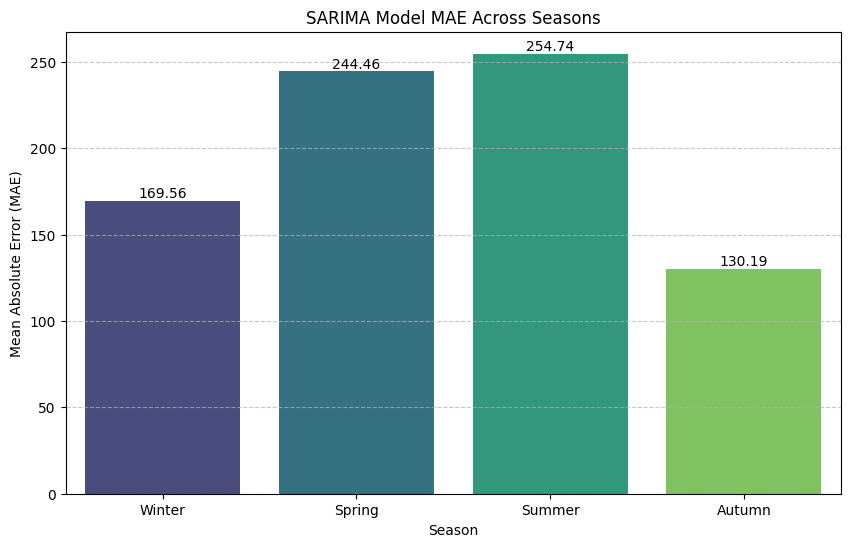

/tmp/ipython-input-1855019703.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='RMSE', data=metrics_df, palette='magma')


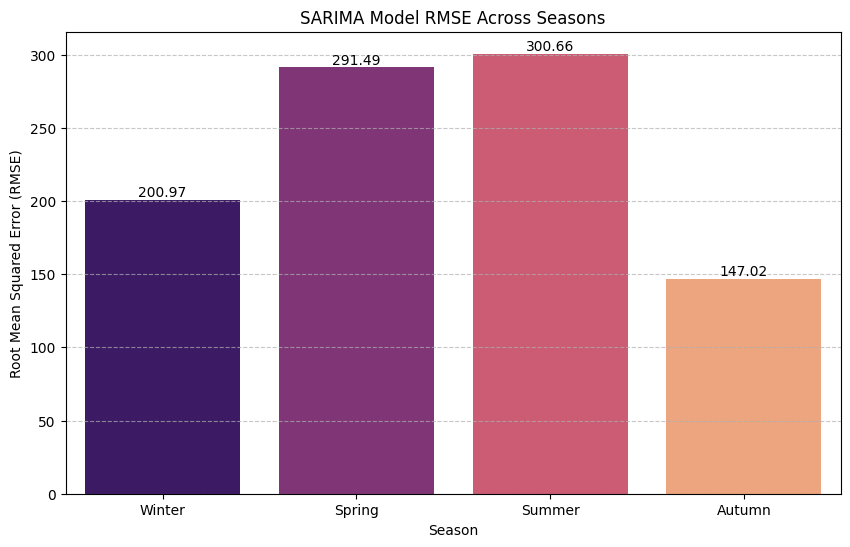

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for plotting MAE and RMSE
metrics_df = pd.DataFrame.from_dict(seasonal_results, orient='index')
metrics_df.index.name = 'Season'
metrics_df = metrics_df[['MAE', 'RMSE']] # Select only MAE and RMSE for plotting

# Plotting MAE
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='MAE', data=metrics_df, palette='viridis')
plt.title('SARIMA Model MAE Across Seasons')
plt.xlabel('Season')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for index, row in metrics_df.iterrows():
    plt.text(index, row['MAE'], round(row['MAE'], 2), color='black', ha="center", va='bottom')
plt.show()

# Plotting RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='RMSE', data=metrics_df, palette='magma')
plt.title('SARIMA Model RMSE Across Seasons')
plt.xlabel('Season')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add values on top of bars
for index, row in metrics_df.iterrows():
    plt.text(index, row['RMSE'], round(row['RMSE'], 2), color='black', ha="center", va='bottom')
plt.show()

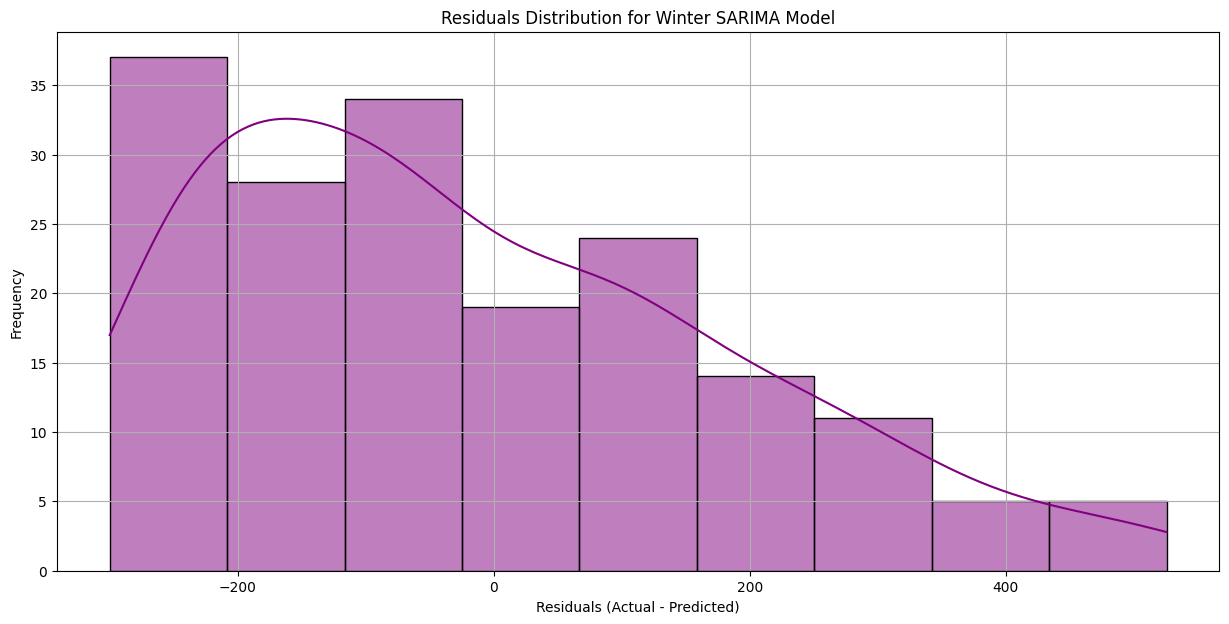

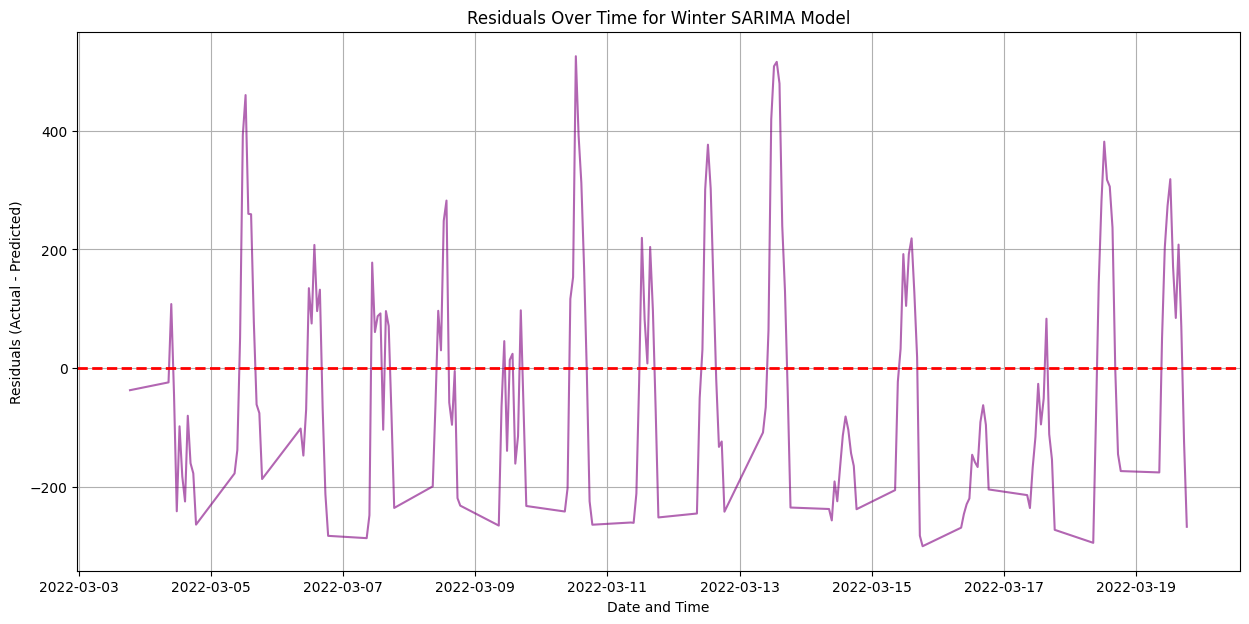

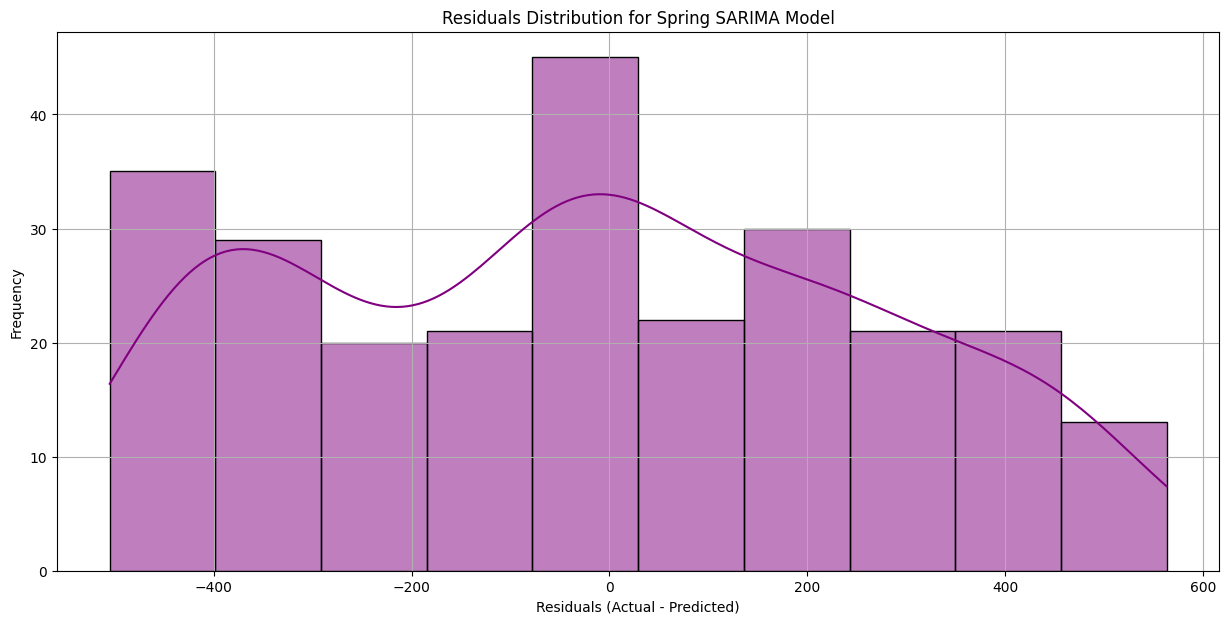

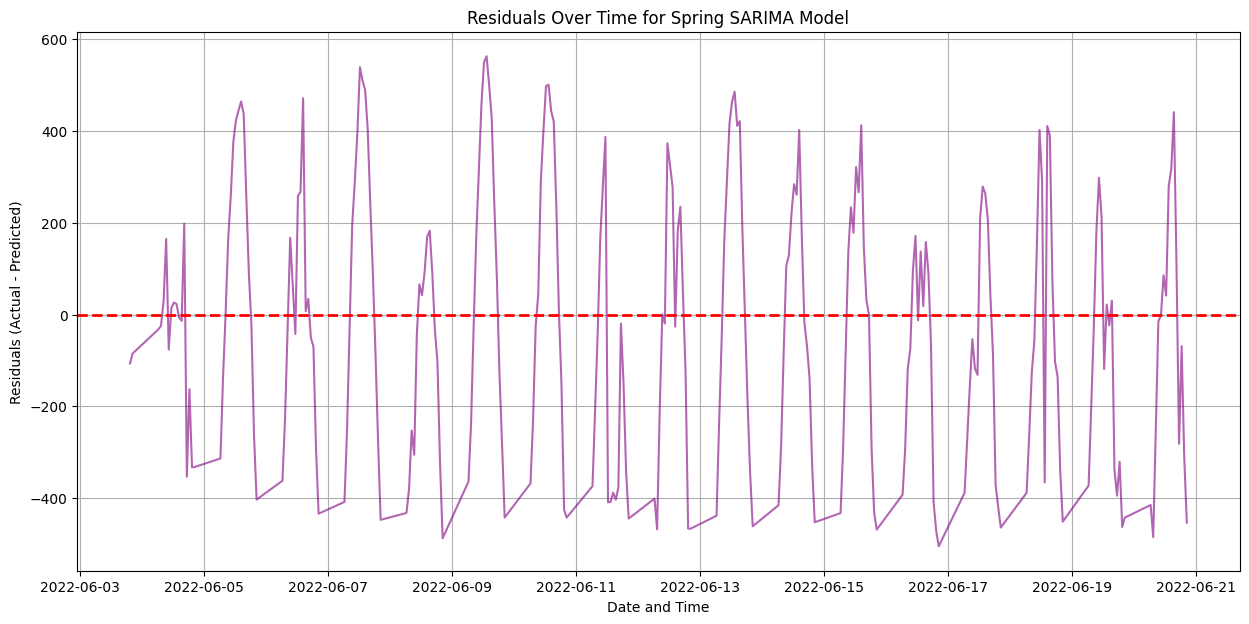

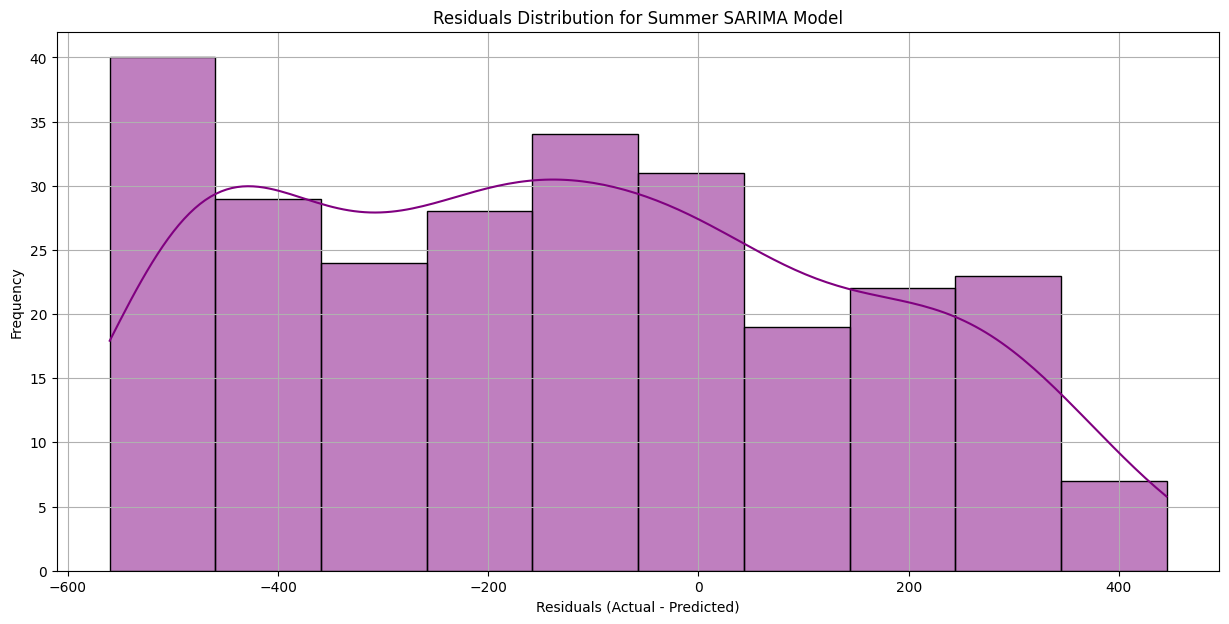

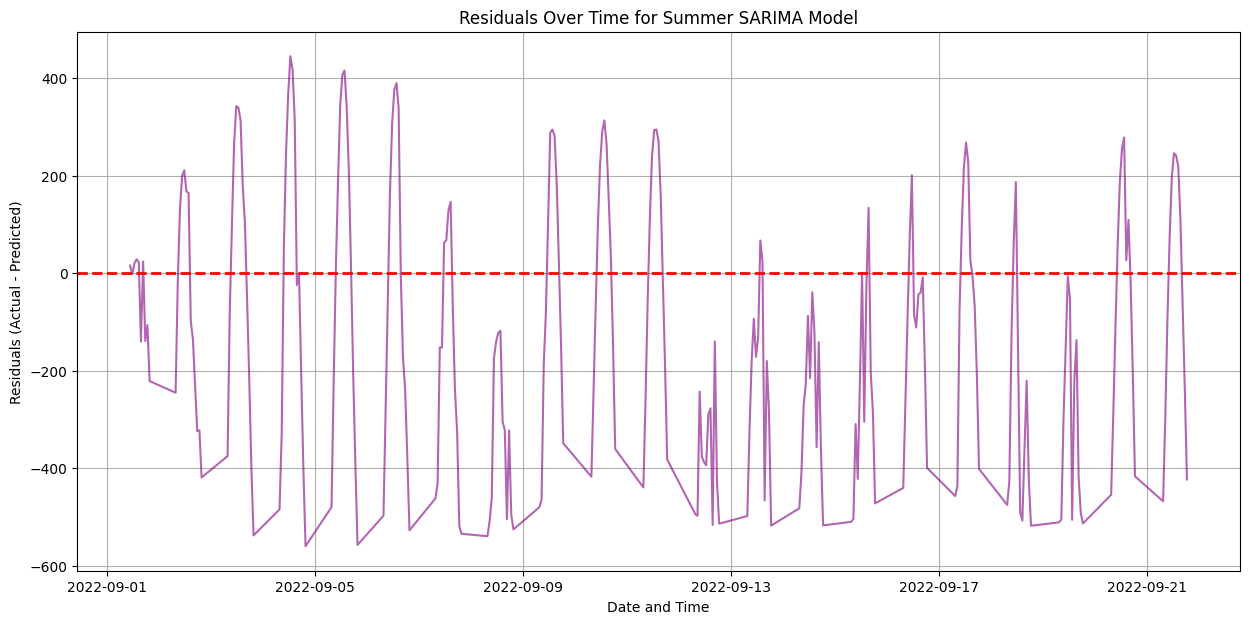

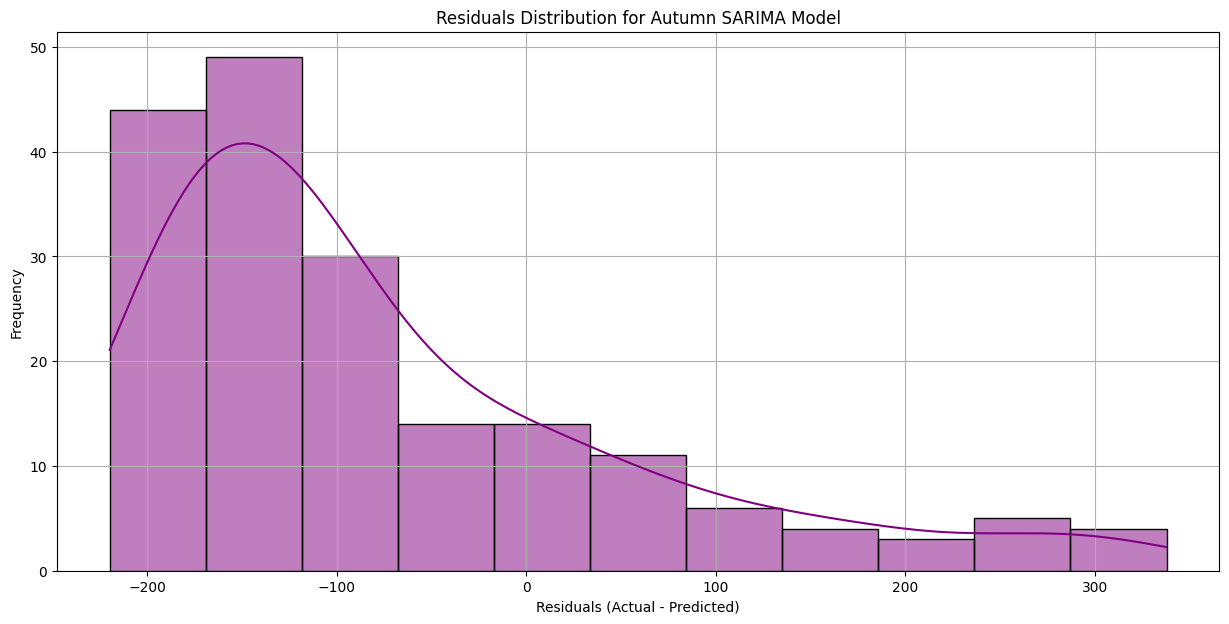

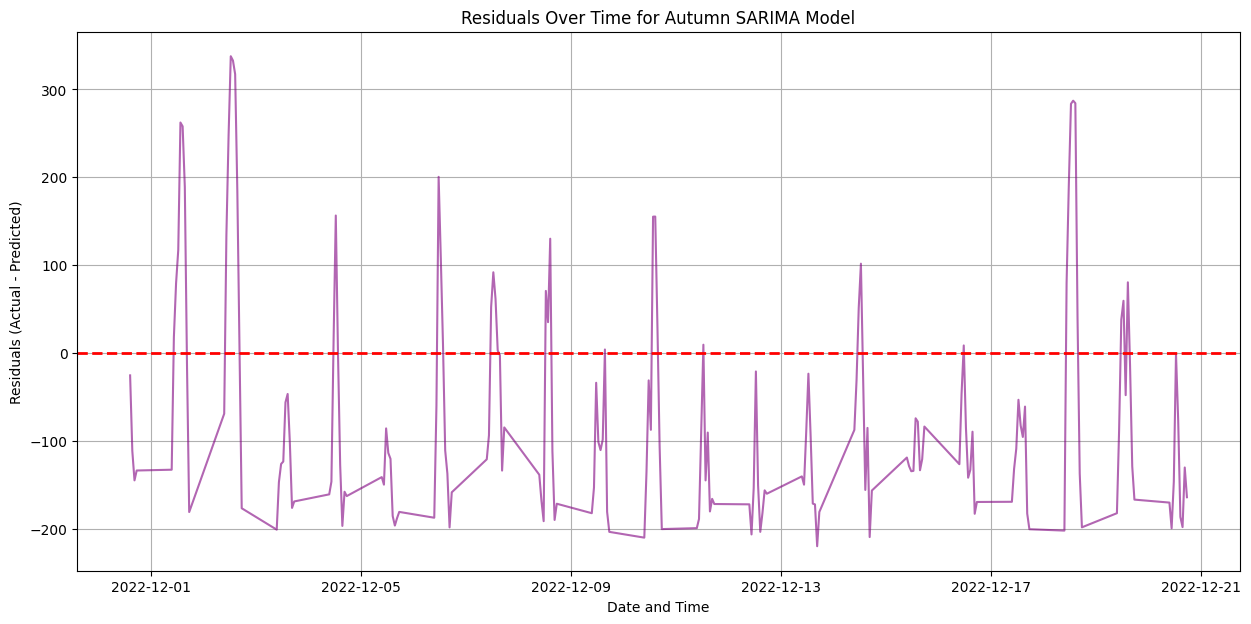

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting residuals for each season
for season_name, metrics in seasonal_results.items():
    plt.figure(figsize=(15, 7))
    sns.histplot(metrics['residuals'], kde=True, color='purple')
    plt.title(f'Residuals Distribution for {season_name} SARIMA Model')
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(15, 7))
    plt.plot(metrics['residuals'].index, metrics['residuals'], color='purple', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--', linewidth=2)
    plt.title(f'Residuals Over Time for {season_name} SARIMA Model')
    plt.xlabel('Date and Time')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.grid(True)
    plt.show()